- **Name - Aditya Jain**

- **Batch No. - DS2310**

- **Assingment - Insurance Claim Fraud Detection**

In [1]:
# import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings # filter warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [3]:
print('No. of rows',data.shape[0])
print('No. of columns',data.shape[1])

No. of rows 1000
No. of columns 40


In [4]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year'], float64: ['policy_annual_premium', '_c39'], object: ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']}

# Statistical Analysis

**Since dataset is large, let check for any entry which is repeated or duplicate in dataset.**

In [6]:
data.duplicated('policy_number').sum()

0

**Lets check any whitespace, 'NA' or '-' exist in dataset.**

In [7]:
data.isin([' ','NA','-']).sum().any()

False

In [8]:
data.isin(['?']).sum().any()

True

**Let's replace '?' with np.NaN**

In [9]:
data = data.replace('?',np.NaN)

# Missing Value Check

In [10]:
Missing_val = data.isnull().sum().sort_values(ascending = False)
percentage_missing_val = (Missing_val/len(data))*100
print(pd.concat([Missing_val,percentage_missing_val], axis = 1, keys=['Missing_values','%Missing values']))

                             Missing_values  %Missing values
_c39                                   1000            100.0
property_damage                         360             36.0
police_report_available                 343             34.3
collision_type                          178             17.8
bodily_injuries                           0              0.0
incident_state                            0              0.0
incident_city                             0              0.0
incident_location                         0              0.0
incident_hour_of_the_day                  0              0.0
number_of_vehicles_involved               0              0.0
fraud_reported                            0              0.0
auto_year                                 0              0.0
auto_model                                0              0.0
authorities_contacted                     0              0.0
total_claim_amount                        0              0.0
injury_claim            

**Observation-:**

- _c39,property_damage,police_report_available,collision_type have contains missing values.
- But, In column _c39 have 100% null values. e gone drop it
- Other missing values impute them with mode of particular activity.


# Missing Value Imputation

In [11]:
# imputation missing values with mode for categorial features
data['property_damage'].fillna(data['property_damage'].mode()[0],inplace=True)
data['police_report_available'].fillna(data['police_report_available'].mode()[0],inplace=True)
data['collision_type'].fillna(data['collision_type'].mode()[0],inplace=True)

In [12]:
# Drop unnecessary columns
data.drop(['_c39','incident_location','insured_zip','policy_number'],axis=1,inplace=True)

# Check missing value after imputation

In [13]:
Missing_val = data.isnull().sum().sort_values(ascending = False)
percentage_missing_val = (Missing_val/len(data))*100
print(pd.concat([Missing_val,percentage_missing_val], axis = 1, keys=['Missing_values','%Missing values']))

                             Missing_values  %Missing values
months_as_customer                        0              0.0
age                                       0              0.0
incident_state                            0              0.0
incident_city                             0              0.0
incident_hour_of_the_day                  0              0.0
number_of_vehicles_involved               0              0.0
property_damage                           0              0.0
bodily_injuries                           0              0.0
witnesses                                 0              0.0
police_report_available                   0              0.0
total_claim_amount                        0              0.0
injury_claim                              0              0.0
property_claim                            0              0.0
vehicle_claim                             0              0.0
auto_make                                 0              0.0
auto_model              

<Axes: >

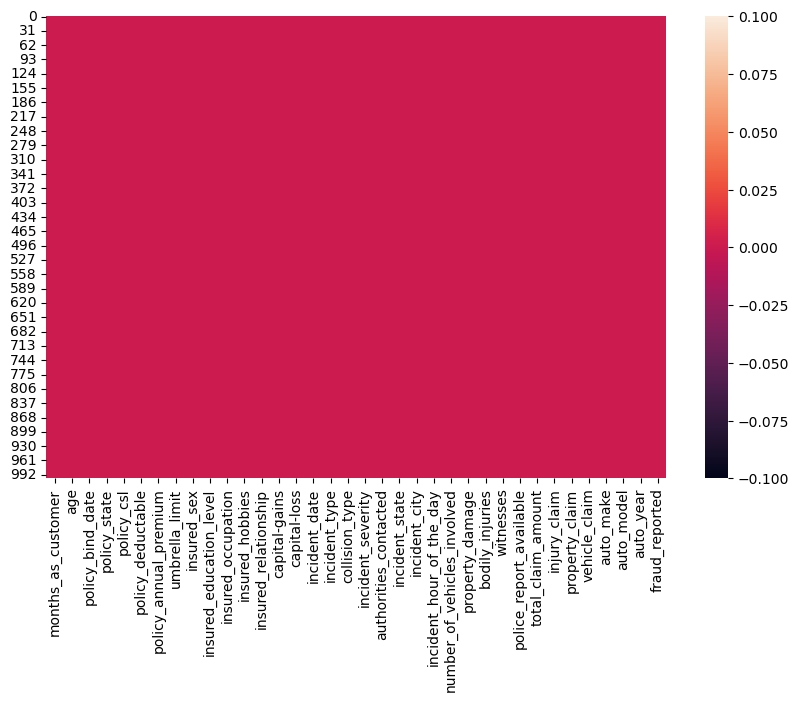

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull())

**No, Missing value is present**

**Details on policy_csl column:**
- Combined single limit (CSL): CLS is a single that describe the predetermined limit for the combined total of the bodily injury
  Liability coverage and property damage liability coverage per occurence or accident.
  
- In this datasets policy_csl columns have numericals data seprated by '/', resulting into object datatype.
- We will split this column into two CSL columns for person and accident.
    

In [15]:
# spliting the extracting policy_csl at'/'
data['CSL_Personal']=data.policy_csl.str.split('/',expand=True)[0]
data['CSL_Accidental']=data.policy_csl.str.split('/',expand=True)[1]

In [16]:
# Now we can drop policy_csl column
data.drop('policy_csl',axis = 1, inplace = True)

**We have 2 features here with datetime datatypes. We gone split them in terms of date, month, year.**

In [17]:
data['policy_bind_date']=pd.to_datetime(data['policy_bind_date'])
data['incident_date']=pd.to_datetime(data['incident_date'])

In [18]:
# Extract Day, Month , year Columns from policy_bind_date
data['policy_bind_day']=data['policy_bind_date'].dt.day
data['policy_bind_month']=data['policy_bind_date'].dt.month
data['policy_bind_year']=data['policy_bind_date'].dt.year

# Extract Day, Month , year Columns from Incident_date
data['incident_day']=data['incident_date'].dt.day
data['incident_month']=data['incident_date'].dt.month
data['incident_year']=data['incident_date'].dt.year

In [19]:
# since extracting is done now we can drop policy_bind_date and incident_date columns
data.drop(['policy_bind_date','incident_date'],axis = 1,inplace = True)

In [20]:
# Incident year for all data is 2015 so we gone drop it.
data.drop('incident_year',axis =1 ,inplace=True)

**We have one column name as 'auto_year' which depict year from which automobile in operatioal on road. In simple word Automobile age.Here we will do some simple features engineering to create new columns with automobile age and drop earlier.**

**As incident_year 2015, we will use 2015 as base year for new column creation.**

In [21]:
# Lets extract age of the vechles from auto_year by subtracting it from the year 2018.
data['Automobile_Age']=2015 - data['auto_year']
# droping autoyear columns
data.drop('auto_year',axis = 1, inplace = True)

# Spliting feature in categorial and numerical features

In [22]:
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age'], float64: ['policy_annual_premium'], object: ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']}

In [23]:
Category = ['policy_state', 'insured_sex','CSL_Personal','CSL_Accidental','insured_education_level', 'insured_occupation', 'insured_hobbies',
            'insured_relationship', 'incident_type', 'collision_type','incident_severity', 'authorities_contacted', 'incident_state', 'incident_city',
            'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']
Numerical = ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 
             'injury_claim', 'property_claim', 'vehicle_claim','policy_bind_day','policy_bind_month','policy_bind_year','incident_day','incident_month','Automobile_Age','policy_annual_premium']

# Statistical Matrix

In [24]:
data.describe().T

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                          1000.0  3.894800e+01  9.140287e+00       19.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
capital-gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
policy_bind_day              1000.0  1.544800e+01  8.850176e+00        1.00   
policy_bind_month            1000.0  6.559000e+00  3.391758e+00        1.00   
policy_bind_year             1000.0  2.001604e+03  7.360391e+00     1990.00   
incident_day                 1000.0  1.308400e+01  1.044318e+01        1.00   
incident_month               1000.0  3.407000e+00  3.276291e+00        1.00   
Automobile_Age               1000.0  9.897000e+00  6.015861e+00        0.00   

                                    25%      50%        75%          max  
months_as_customer             115.7500    199.5    276.250       479.00  
age                             32.0000     38.0     44.000        64.00  
policy_deductable              500.0000   1000.0   2000.000      2000.00  
policy_annual_premium         1089.6075   1257.2   1415.695      2047.59  
umbrella_limit                   0.0000      0.0      0.000  10000000.00  
capital-gains                    0.0000      0.0  51025.000    100500.00  
capital-loss                -51500.0000 -23250.0      0.000         0.00  
incident_hour_of_the_day         6.0000     12.0     17.000        23.00  
number_of_vehicles_involved      1.0000      1.0      3.000         4.00  
bodily_injuries                  0.0000      1.0      2.000         2.00  
witnesses                        1.0000      1.0      2.000         3.00  
total_claim_amount           41812.5000  58055.0  70592.500    114920.00  
injury_claim                  4295.0000   6775.0  11305.000     21450.00  
property_claim                4445.0000   6750.0  10885.000     23670.00  
vehicle_claim                30292.5000  42100.0  50822.500     79560.00  
policy_bind_day                  8.0000     16.0     23.000        31.00  
policy_bind_month                4.0000      7.0      9.000        12.00  
policy_bind_year              1995.0000   2002.0   2008.000      2015.00  
incident_day                     2.0000     15.0     22.000        31.00  
incident_month                   1.0000      2.0      5.000        12.00  
Automobile_Age                   5.0000     10.0     15.000        20.00

In [25]:
data[Category].describe().T

count unique                      top freq
policy_state             1000      3                       OH  352
insured_sex              1000      2                   FEMALE  537
CSL_Personal             1000      3                      250  351
CSL_Accidental           1000      3                      500  351
insured_education_level  1000      7                       JD  161
insured_occupation       1000     14        machine-op-inspct   93
insured_hobbies          1000     20                  reading   64
insured_relationship     1000      6                own-child  183
incident_type            1000      4  Multi-vehicle Collision  419
collision_type           1000      3           Rear Collision  470
incident_severity        1000      4             Minor Damage  354
authorities_contacted    1000      5                   Police  292
incident_state           1000      7                       NY  262
incident_city            1000      7              Springfield  157
property_damage          1000      2                       NO  698
police_report_available  1000      2                       NO  686
auto_make                1000     14                     Saab   80
auto_model               1000     39                      RAM   43
fraud_reported           1000      2                        N  753

# Starting Exploring categorial features with Enlisting value counts & Sub-Categories

In [26]:
for i in Category:
    print(i)
    print(data[i].value_counts())
    print('='*100)

policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
CSL_Personal
250    351
100    349
500    300
Name: CSL_Personal, dtype: int64
CSL_Accidental
500     351
300     349
1000    300
Name: CSL_Accidental, dtype: int64
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
insured_hobbies
reading           64
exercise          57
paintball         57
bungie-jumpin

# EDA

**Start EDA by analysing our target variable first.**

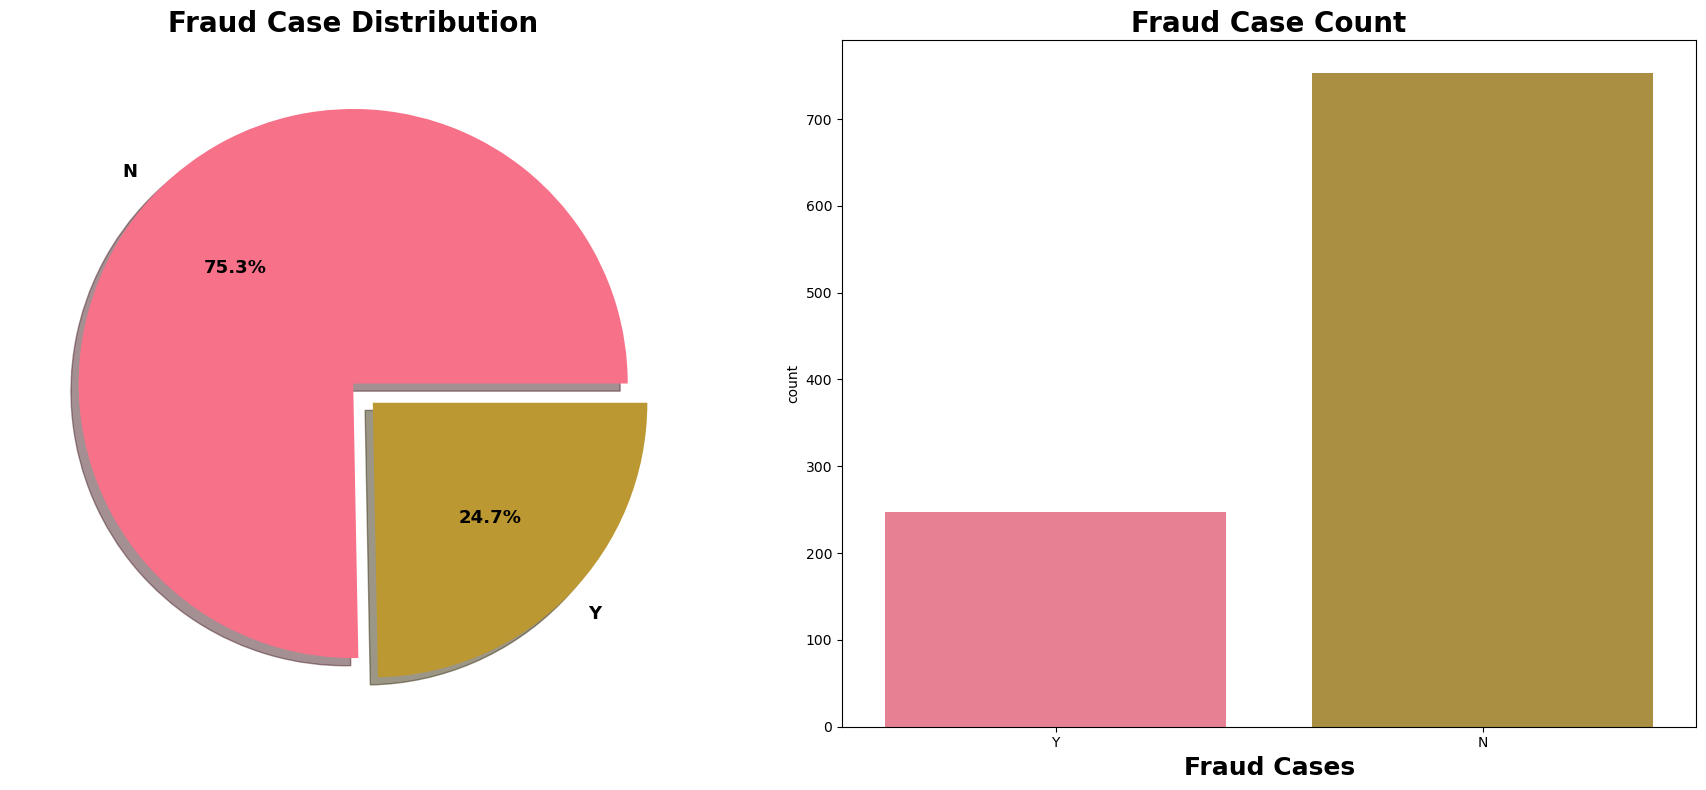

In [27]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('husl')
f, ax=plt.subplots(1,2,figsize=(18,8))
data['fraud_reported'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',textprops = {'fontweight':'bold','fontsize':13}, ax = ax[0],shadow=True)
ax[0].set_title('Fraud Case Distribution', fontsize =20, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot(x='fraud_reported', data=data, ax=ax[1])
ax[1].set_title("Fraud Case Count", fontsize=20, fontweight='bold')
ax[1].set_xlabel("Fraud Cases", fontsize=18, fontweight='bold')
plt.show()

- Out of all cases around 24.7 % cases are fraud.
- 'fraud_reported' is our target variable to be predicted. From count plot we can say dataset is imbalanced in nature.

# Analysis Age V/s Fraud

In [28]:
print('Minimum Age',data['age'].min(),'Years')
print('Maximum Age',data['age'].max(),'Years')
print('Average Age',data['age'].mean(),'Years')

Minimum Age 19 Years
Maximum Age 64 Years
Average Age 38.948 Years


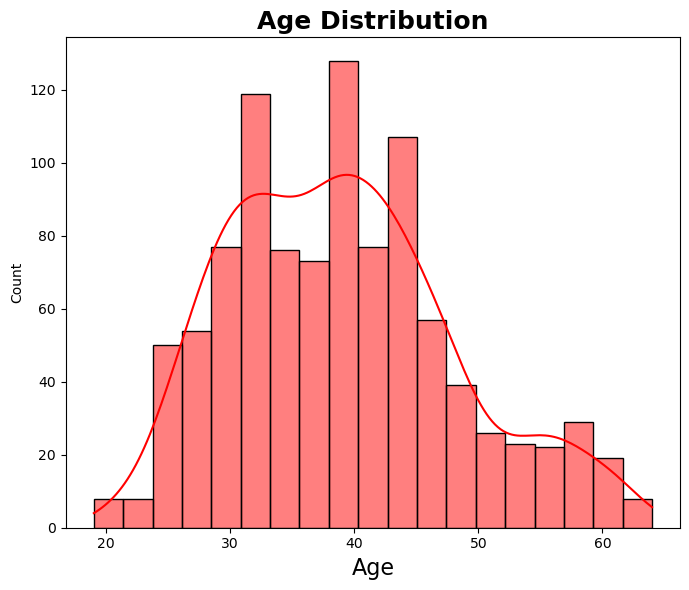

In [29]:
plt.figure(figsize=(7,6))
sns.histplot(x='age',data=data,kde=True, color = 'red')
plt.xlabel('Age', fontsize = 16)
plt.title("Age Distribution", fontsize = 18,fontweight='bold')
plt.show()

In [30]:
# spliting age in different age range
data['age_group'] = pd.cut(data.age, bins= [0,10,20,30,40,50,60,70],
                          include_lowest = True, labels = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70'])

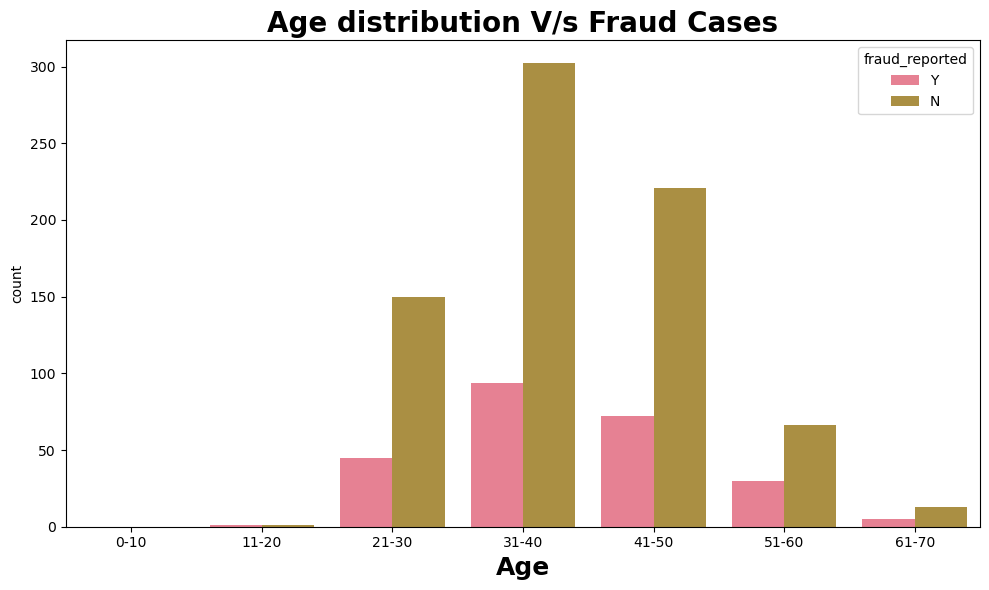

In [31]:
plt.figure(figsize = (10,6))
sns.countplot(x = data.age_group, hue = data.fraud_reported)
plt.xlabel("Age", fontsize = 18,fontweight = 'bold')
plt.title("Age distribution V/s Fraud Cases", fontsize = 20, fontweight = 'bold')
plt.show()

- Maximum Fraud Cases comes from people with age group of 31-50 years.
- Very few cases in 60+ years old peoples.

# Policy State V/s  Fraud Cases

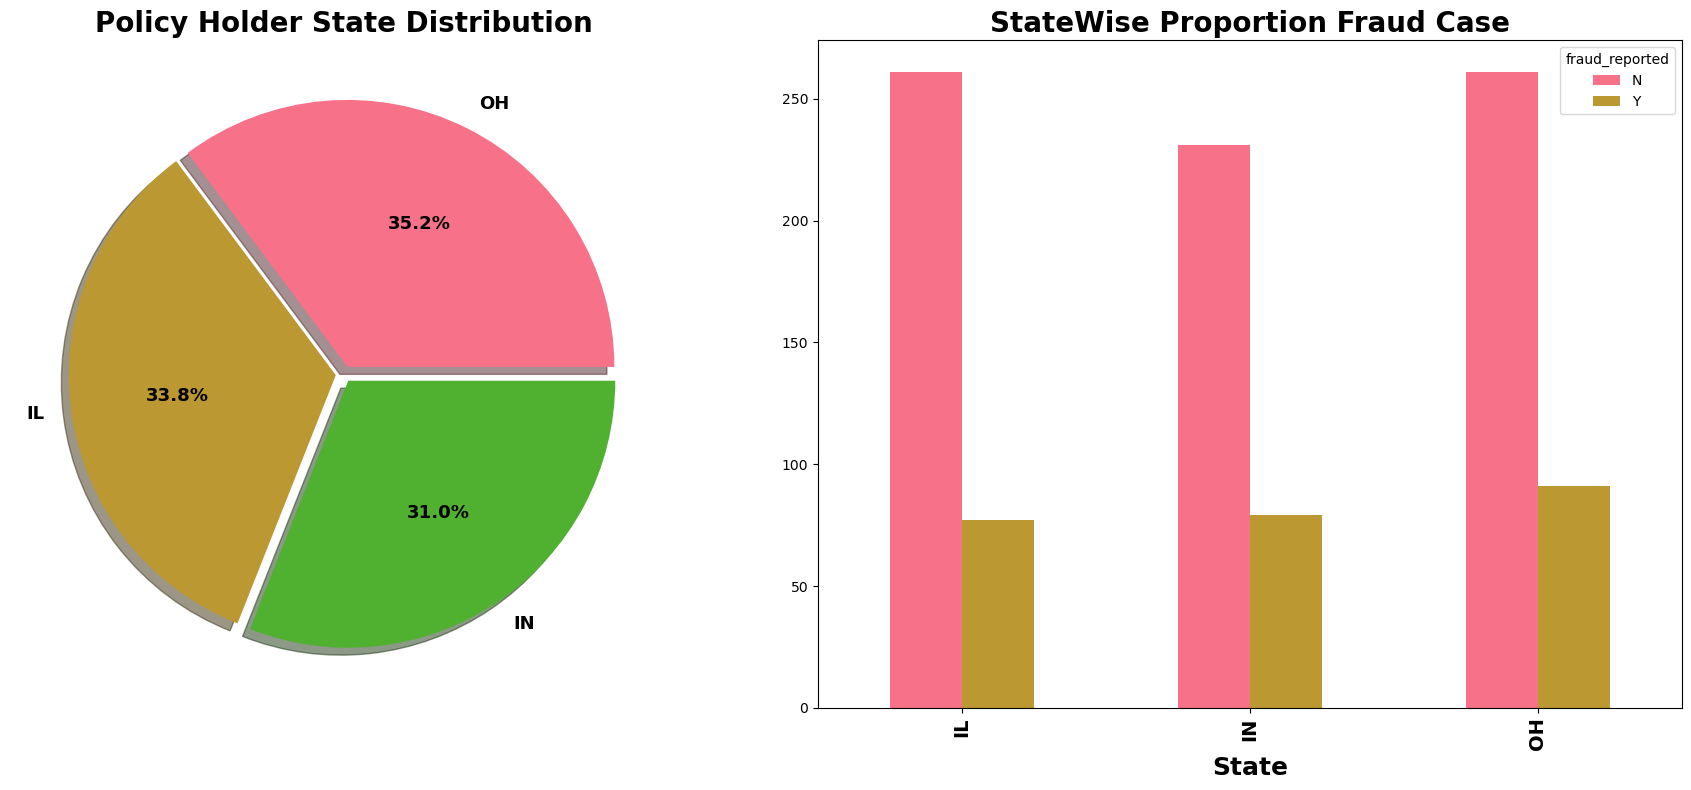

In [32]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('husl')
f, ax=plt.subplots(1,2,figsize=(18,8))
data['policy_state'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',textprops = {'fontweight':'bold','fontsize':13}, ax = ax[0],shadow=True)
ax[0].set_title('Policy Holder State Distribution', fontsize =20, fontweight='bold')
ax[0].set_ylabel('')
table = pd.crosstab(data['policy_state'],data['fraud_reported'])
table.plot(kind='bar', ax=ax[1])
ax[1].set_title("StateWise Proportion Fraud Case", fontsize=20, fontweight='bold')
ax[1].set_xlabel("State", fontsize=18, fontweight='bold')
plt.xticks(fontsize = 14, fontweight='bold')
plt.show()

- Almost same amount of cases comes from each state.
- Maximum fraud cases comes from state of Ohio.

# Insured Gender V/s Fraud Cases

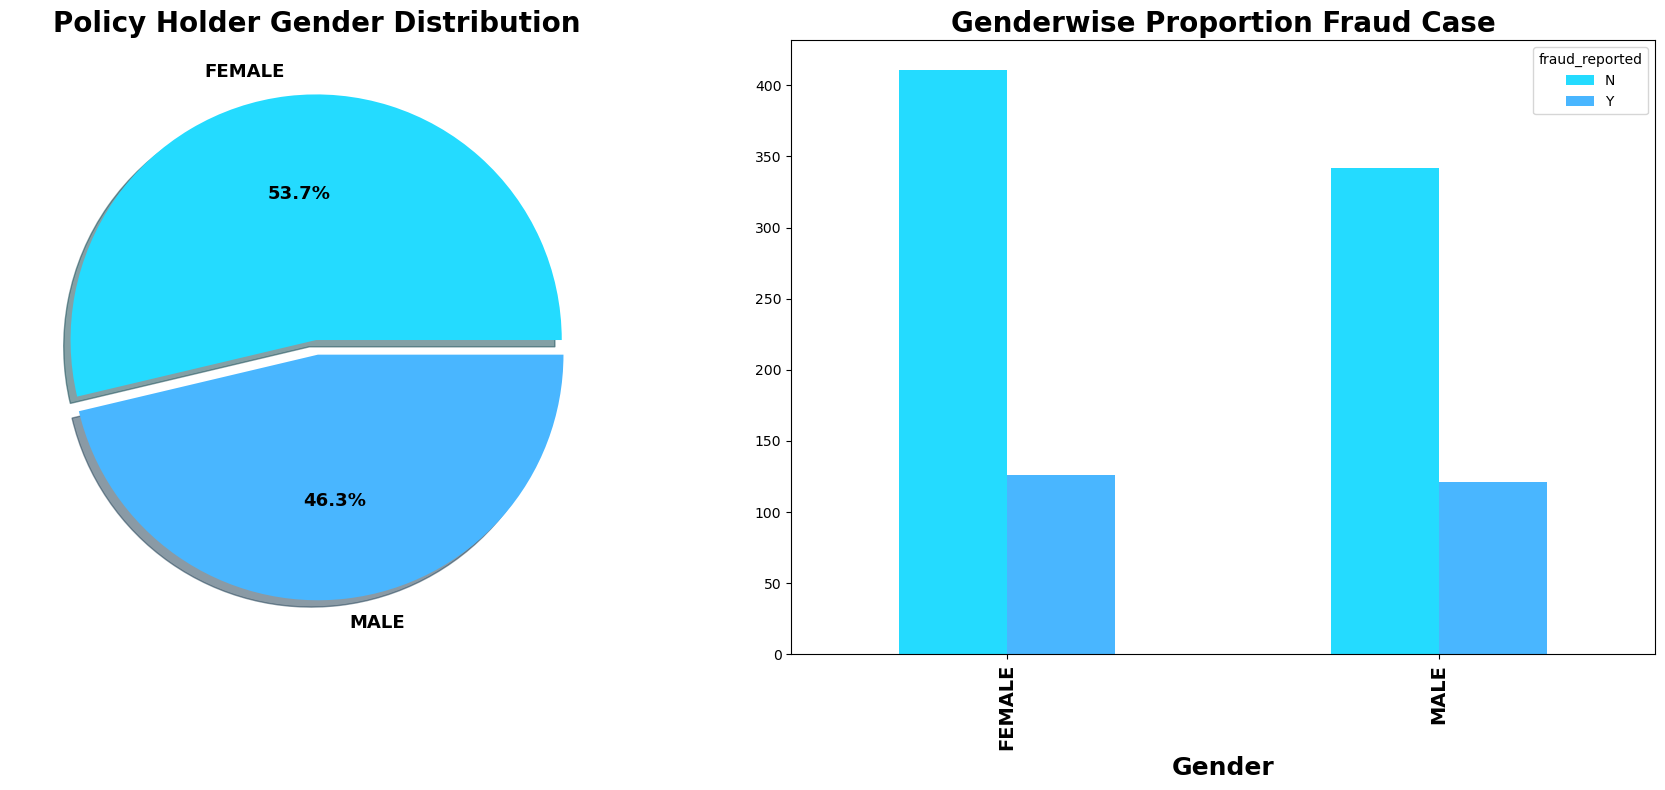

In [33]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('cool')
f, ax=plt.subplots(1,2,figsize=(18,8))
data['insured_sex'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.1f%%',textprops = {'fontweight':'bold','fontsize':13}, ax = ax[0],shadow=True)
ax[0].set_title('Policy Holder Gender Distribution', fontsize =20, fontweight='bold')
ax[0].set_ylabel('')
table = pd.crosstab(data['insured_sex'],data['fraud_reported'])
table.plot(kind='bar', ax=ax[1])
ax[1].set_title("Genderwise Proportion Fraud Case", fontsize=20, fontweight='bold')
ax[1].set_xlabel("Gender", fontsize=18, fontweight='bold')
plt.xticks(fontsize = 14, fontweight='bold')
plt.show()

- Number of claim comes from female is higher than which reported by male insured.
- Almost same amount of fraud cases comes from from same gender.

# Education_level V/s Fraud cases

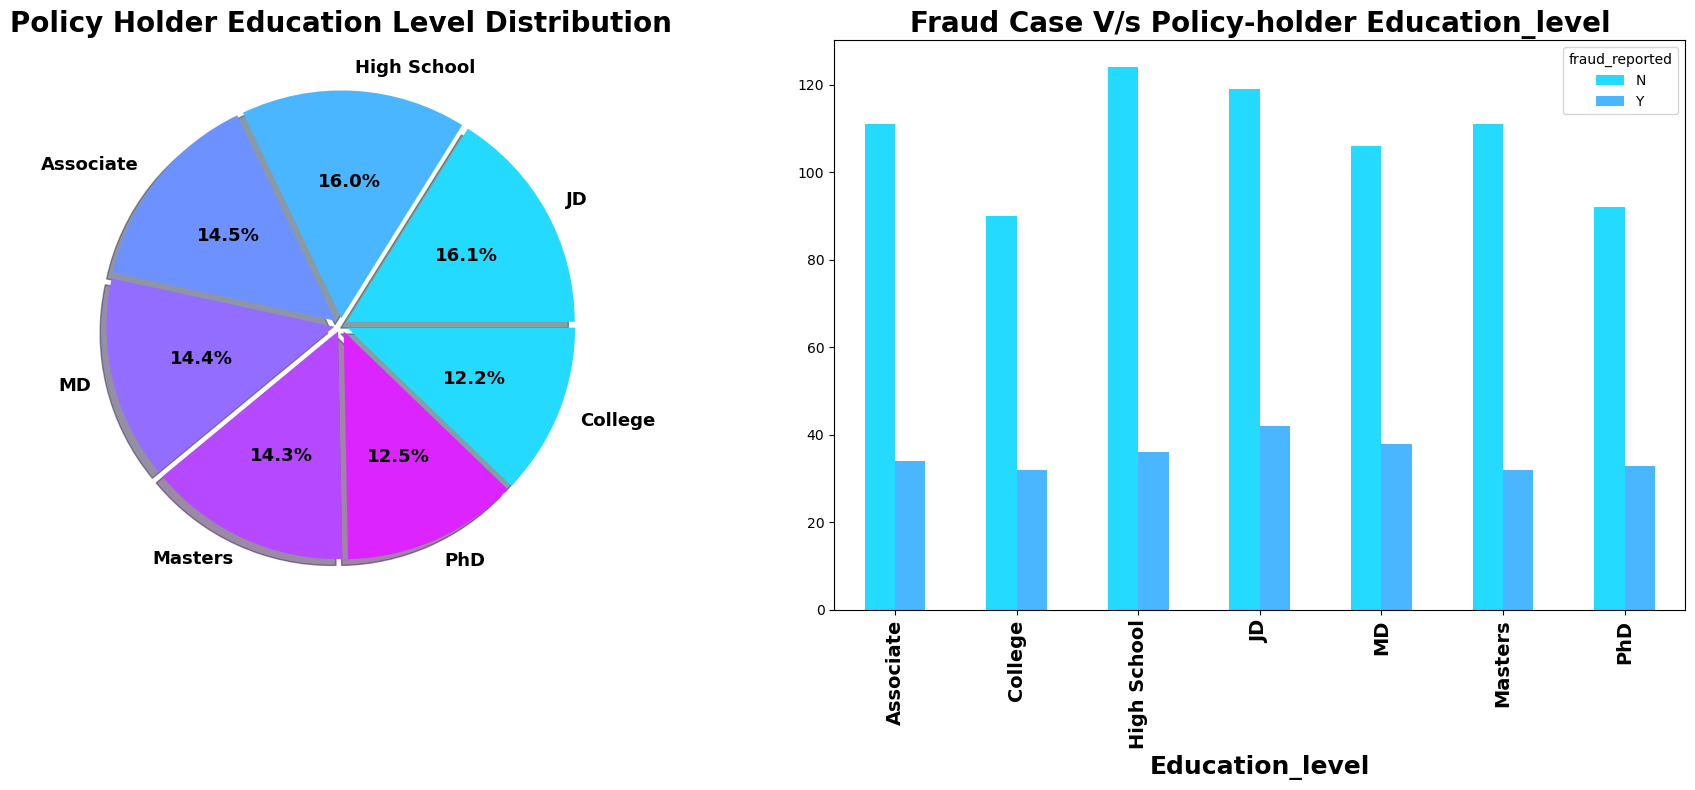

In [34]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('cool')
f, ax=plt.subplots(1,2,figsize=(18,8))
data['insured_education_level'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03,0.03,0.03,0.03],autopct='%2.1f%%',textprops = {'fontweight':'bold','fontsize':13}, ax = ax[0],shadow=True)
ax[0].set_title('Policy Holder Education Level Distribution', fontsize =20, fontweight='bold')
ax[0].set_ylabel('')
table = pd.crosstab(data['insured_education_level'],data['fraud_reported'])
table.plot(kind='bar', ax=ax[1])
ax[1].set_title("Fraud Case V/s Policy-holder Education_level", fontsize=20, fontweight='bold')
ax[1].set_xlabel("Education_level", fontsize=18, fontweight='bold')
plt.xticks(fontsize = 14, fontweight='bold')
plt.show()

# Occupation of Insured Customers

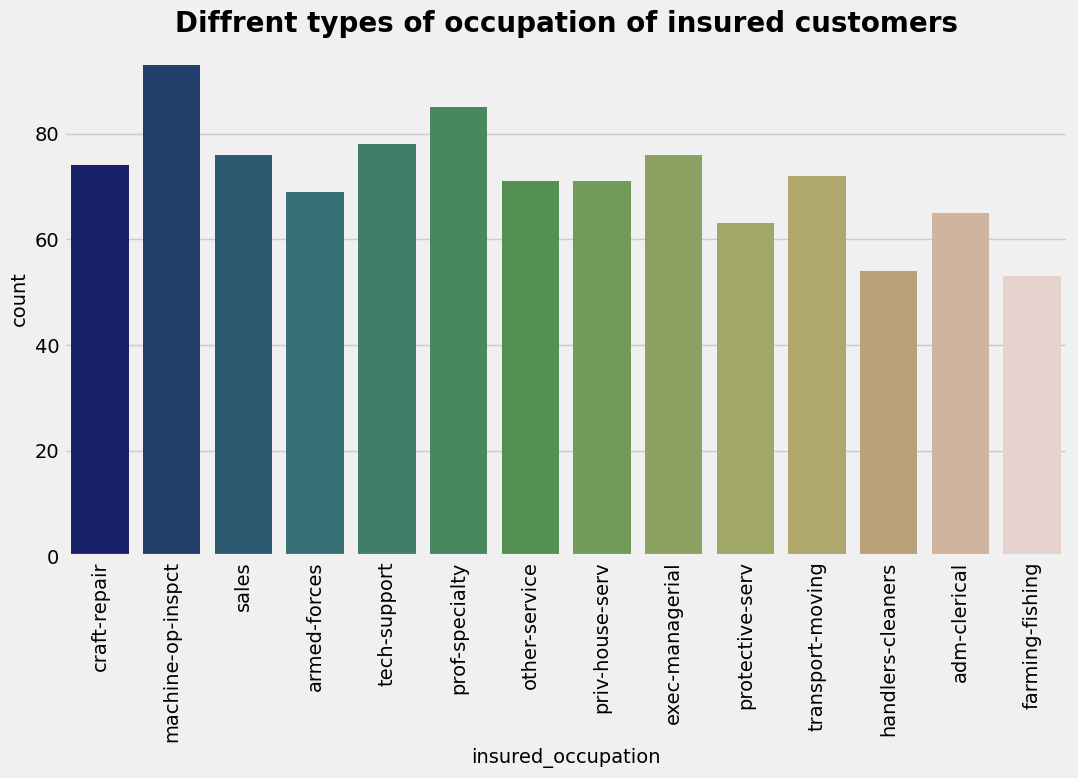

In [35]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,8)
sns.countplot(x='insured_occupation',data=data, palette = 'gist_earth')
plt.title("Diffrent types of occupation of insured customers", fontsize = 20, fontweight ='bold' )
plt.xticks(rotation=90)
plt.show()

# Hobbies of Insured Customers

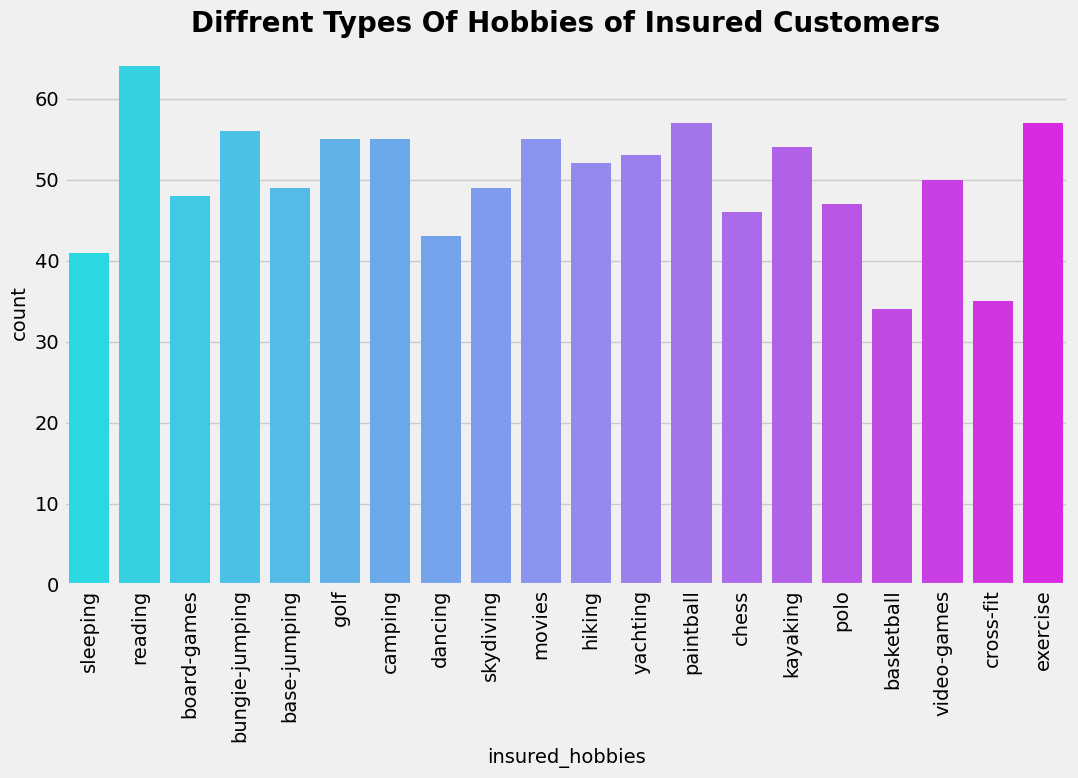

In [36]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,8)
sns.countplot(x='insured_hobbies',data=data, palette = 'cool')
plt.title("Diffrent Types Of Hobbies of Insured Customers", fontsize = 20, fontweight ='bold' )
plt.xticks(rotation=90)
plt.show()

# Diffrent types of incidents V/s Fraud Cases

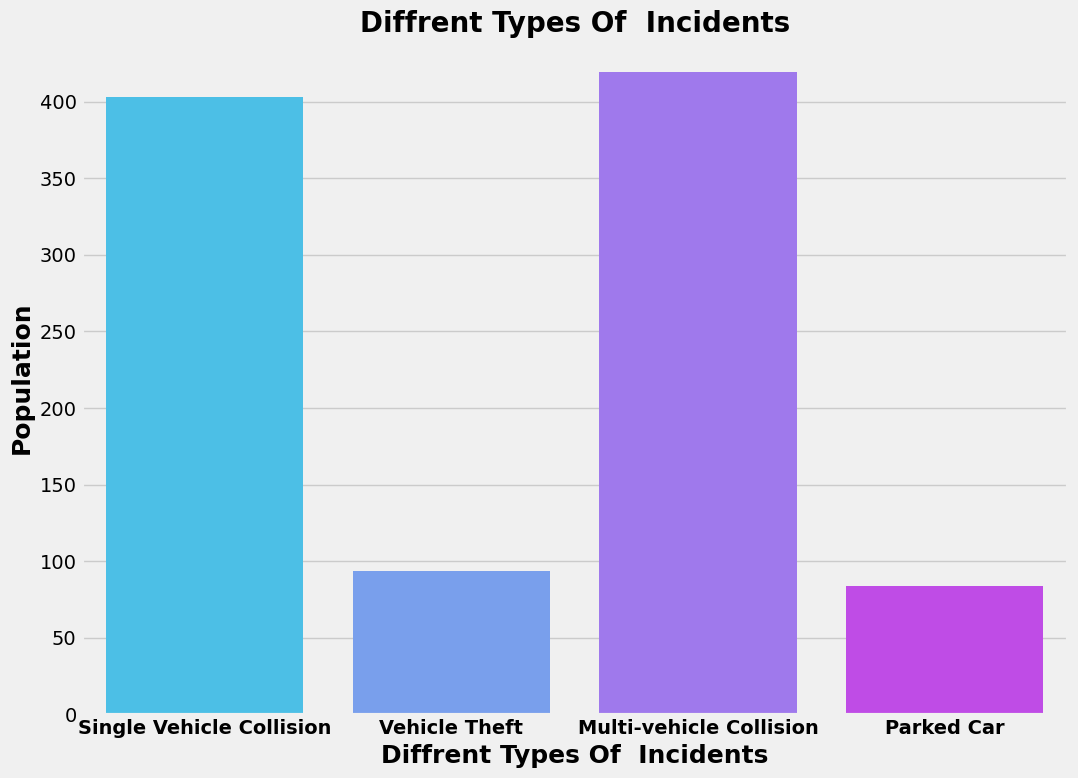

In [37]:
plt.rcParams['figure.figsize'] = (11,8)
sns.countplot(x='incident_type',data=data, palette = 'cool')
plt.title("Diffrent Types Of  Incidents", fontsize = 20, fontweight ='bold' )
plt.xlabel("Diffrent Types Of  Incidents", fontsize = 18, fontweight ='bold' )
plt.ylabel("Population", fontsize = 18, fontweight ='bold' )
plt.xticks(fontweight='bold')
plt.show()

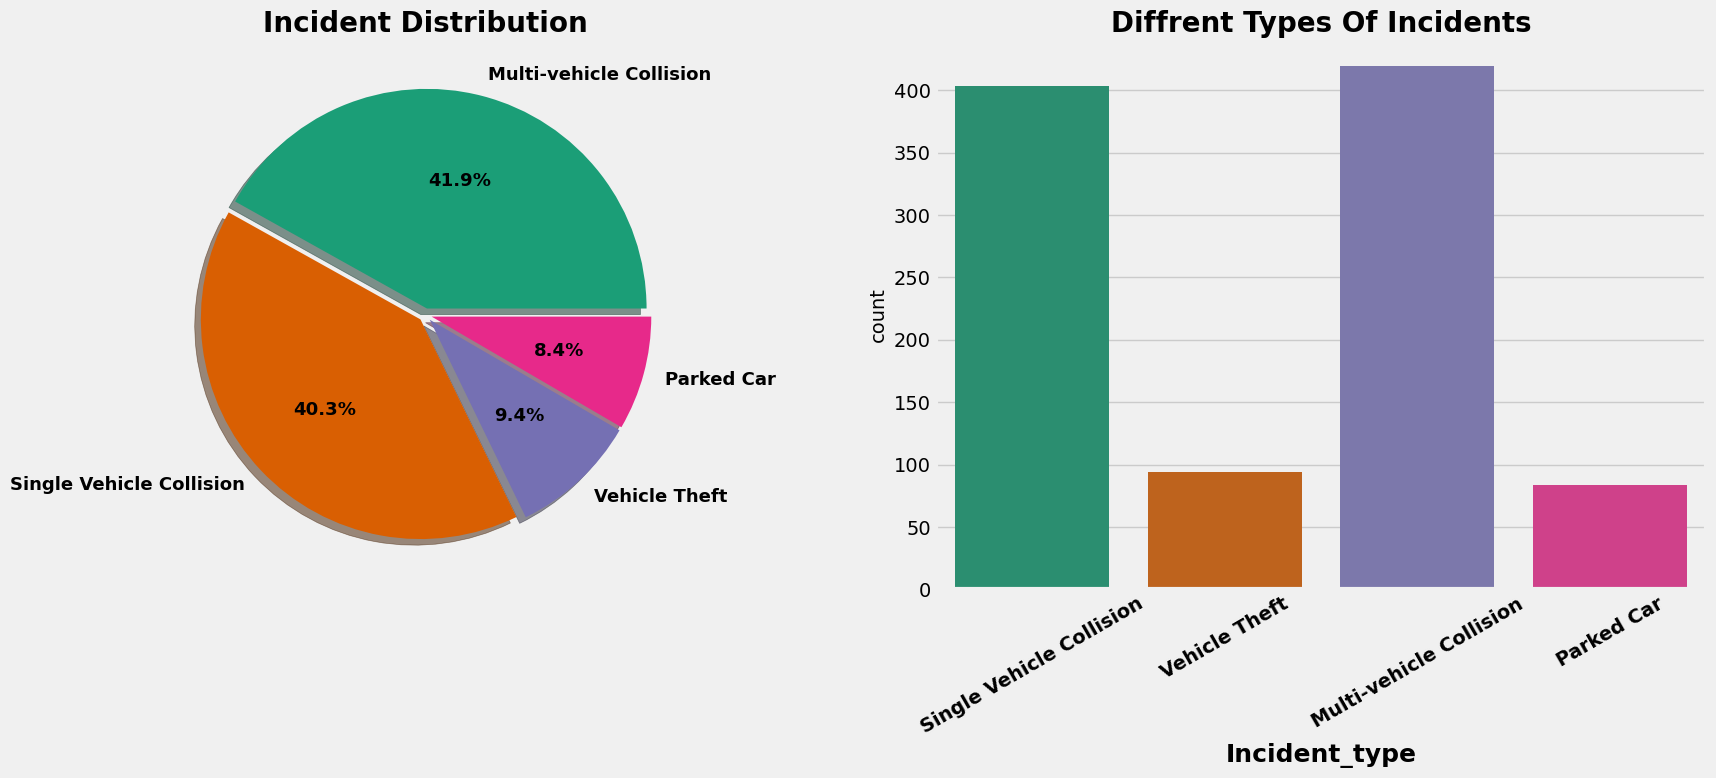

In [38]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('Dark2')
f, ax=plt.subplots(1,2,figsize=(18,8))
data['incident_type'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03],autopct='%2.1f%%',textprops = {'fontweight':'bold','fontsize':13}, ax = ax[0],shadow=True)
ax[0].set_title('Incident Distribution', fontsize =20, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot(x='incident_type', data=data, ax=ax[1])
ax[1].set_title("Diffrent Types Of Incidents", fontsize=20, fontweight='bold')
ax[1].set_xlabel("Incident_type", fontsize=18, fontweight='bold')
plt.xticks(fontsize = 14, rotation=30,fontweight='bold')
plt.show()

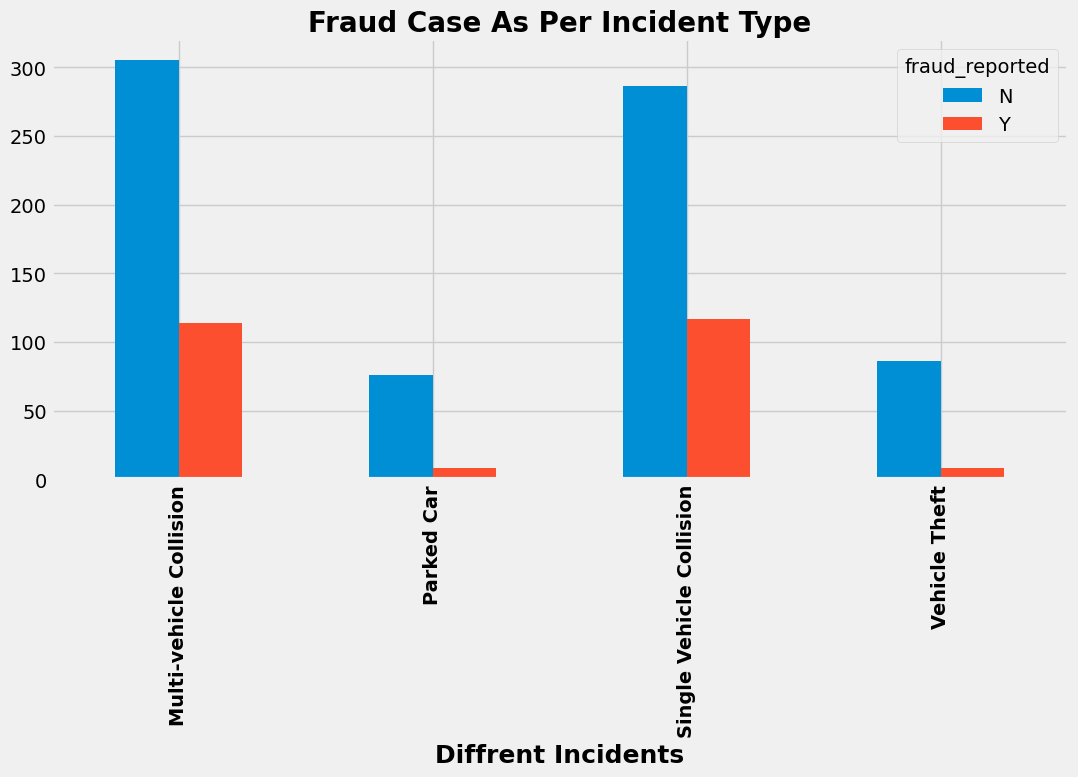

In [39]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,8)
table = pd.crosstab(data['incident_type'],data['fraud_reported'])
table.plot(kind='bar')
plt.title("Fraud Case As Per Incident Type",fontsize = 20,fontweight='bold')
plt.xlabel('Diffrent Incidents',fontsize = 18, fontweight = 'bold')
plt.xticks(fontsize = 14,fontweight = 'bold')
plt.show()

- Most of case comes from Multi-vehicle and Singe-vehicle collision.
- Some claims are due to automobile robbery.
- One claim out of three claim is fraud in multi or single vehicles collison incident

# Exploration Of Different Collision

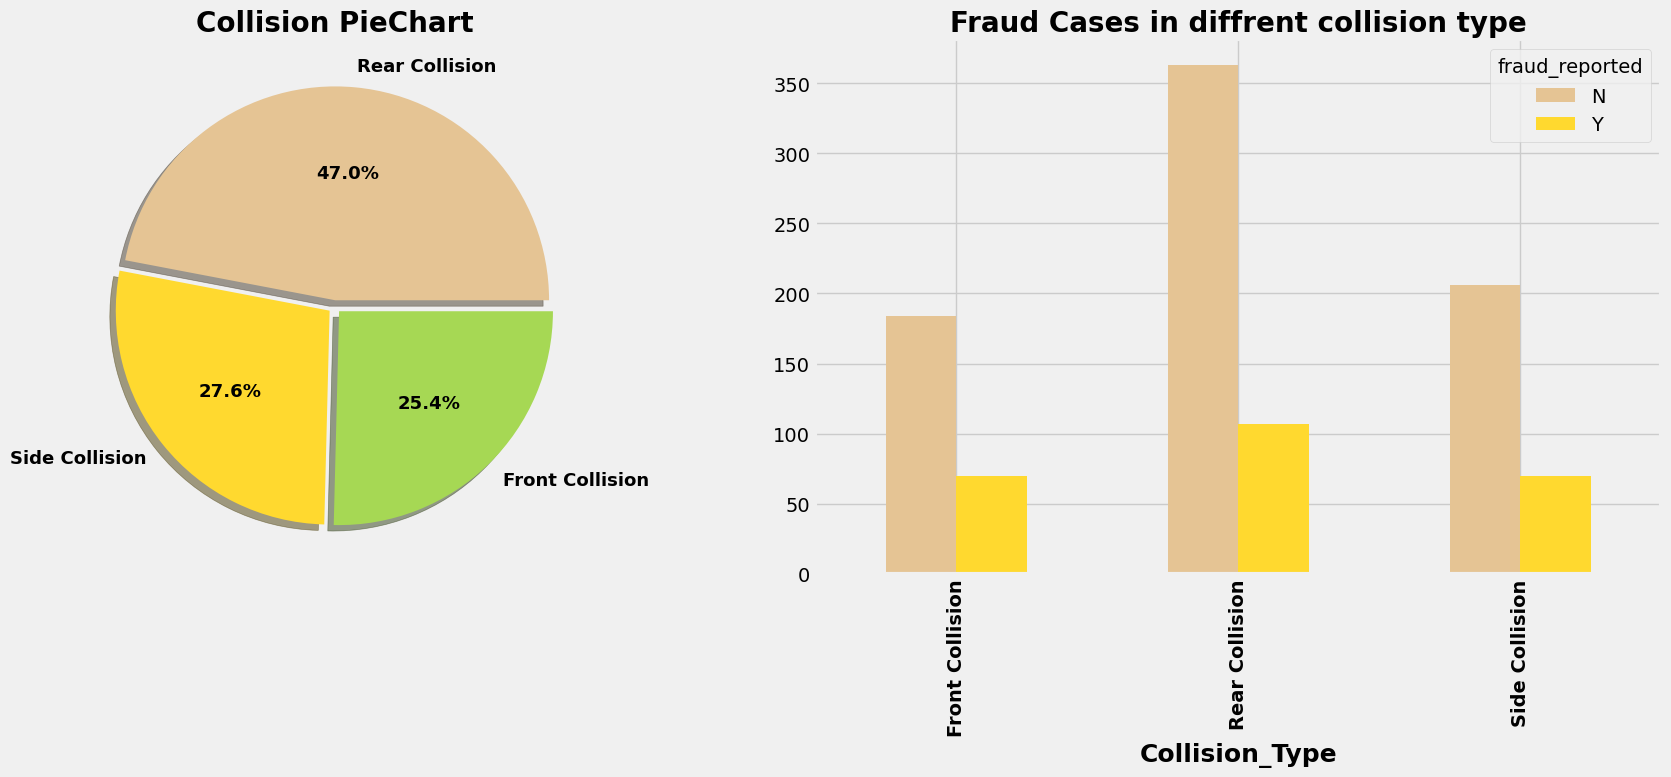

In [40]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('Set2_r')
f, ax=plt.subplots(1,2,figsize=(18,8))
data['collision_type'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',textprops = {'fontweight':'bold','fontsize':13}, ax = ax[0],shadow=True)
ax[0].set_title('Collision PieChart', fontsize =20, fontweight='bold')
ax[0].set_ylabel('')
table = pd.crosstab(data['collision_type'],data['fraud_reported'])
table.plot(kind='bar', ax=ax[1])
ax[1].set_title("Fraud Cases in diffrent collision type", fontsize=20, fontweight='bold')
ax[1].set_xlabel("Collision_Type", fontsize=18, fontweight='bold')
plt.xticks(fontsize = 14, fontweight='bold')
plt.show()

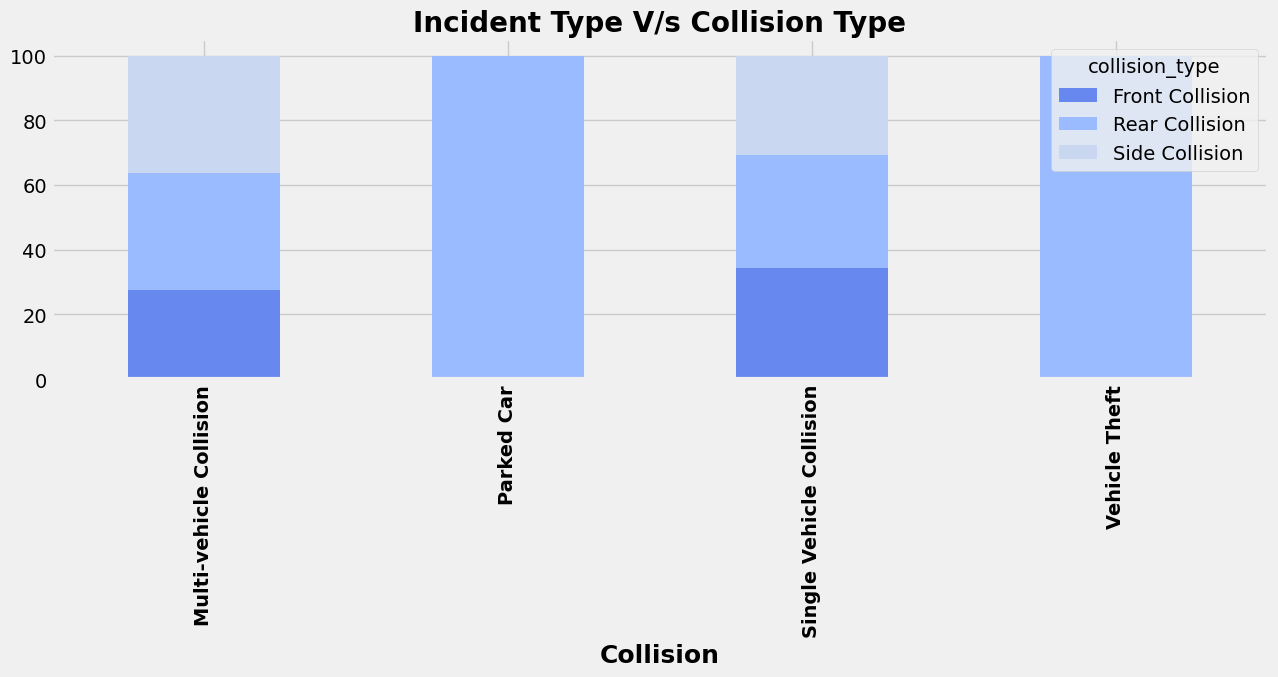

In [41]:
# Let's check insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.set_palette('coolwarm')
table = pd.crosstab(data['incident_type'],data['collision_type'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked = True)
plt.title("Incident Type V/s Collision Type",fontsize = 20,fontweight='bold')
plt.xlabel('Collision',fontsize = 18, fontweight = 'bold')
plt.xticks(fontsize = 14,fontweight = 'bold')
plt.show()

# Collision Vs Incident Severity

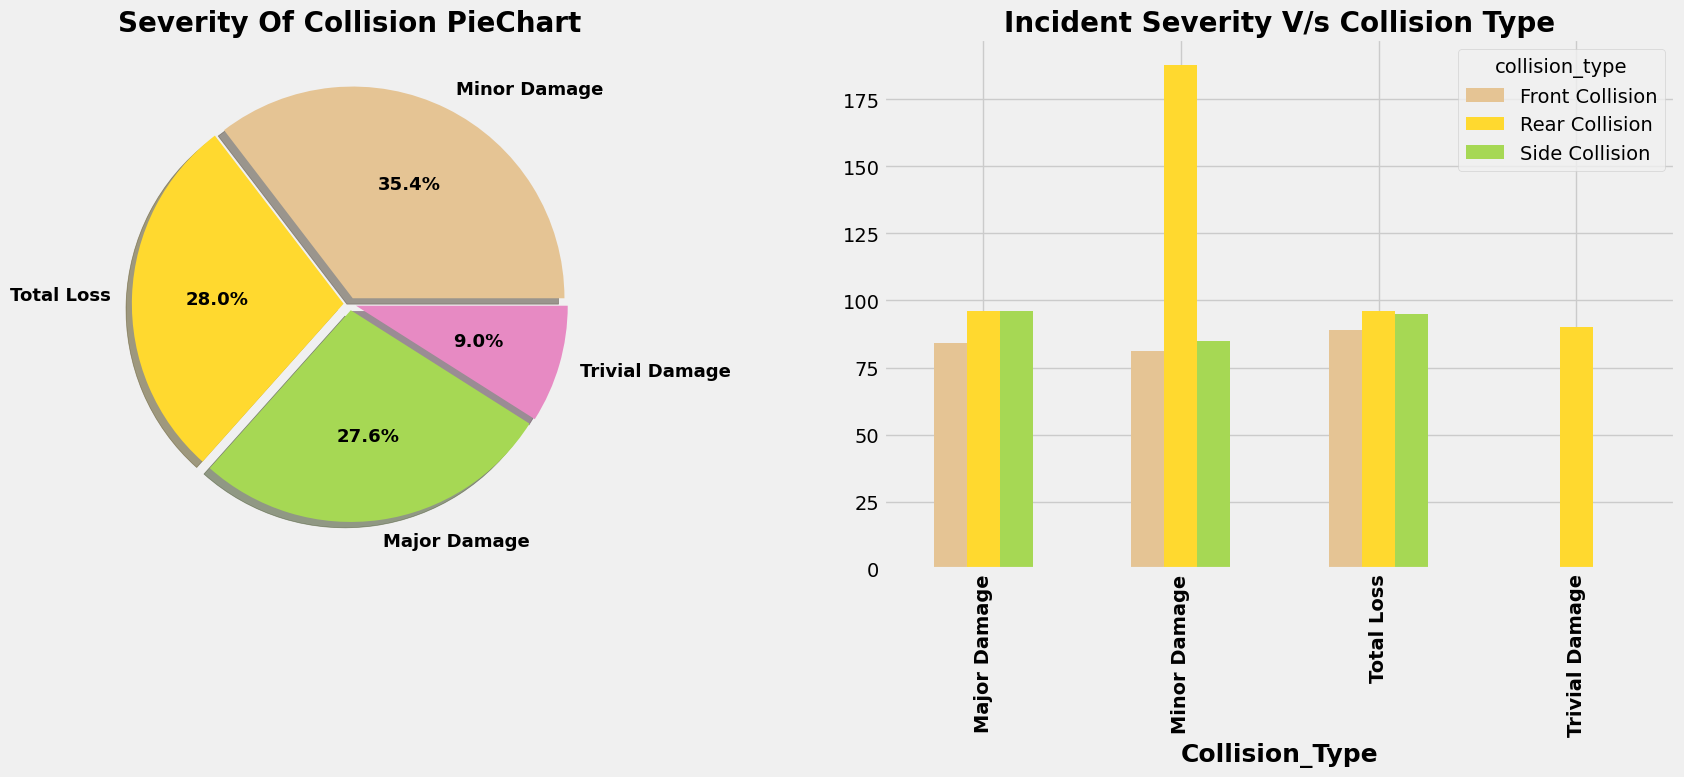

In [42]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('Set2_r')
f, ax=plt.subplots(1,2,figsize=(18,8))
data['incident_severity'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03],autopct='%2.1f%%',textprops = {'fontweight':'bold','fontsize':13}, ax = ax[0],shadow=True)
ax[0].set_title('Severity Of Collision PieChart', fontsize =20, fontweight='bold')
ax[0].set_ylabel('')
table = pd.crosstab(data['incident_severity'],data['collision_type'])
table.plot(kind='bar', ax=ax[1])
ax[1].set_title("Incident Severity V/s Collision Type", fontsize=20, fontweight='bold')
ax[1].set_xlabel("Collision_Type", fontsize=18, fontweight='bold')
plt.xticks(fontsize = 14, fontweight='bold')
plt.show()

**Lets Check another plot of incident Type V/s Severity of Collision to gain more insight.**

In [43]:
pd.crosstab(data['incident_type'],data['incident_severity']).style.background_gradient(cmap='summer_r')

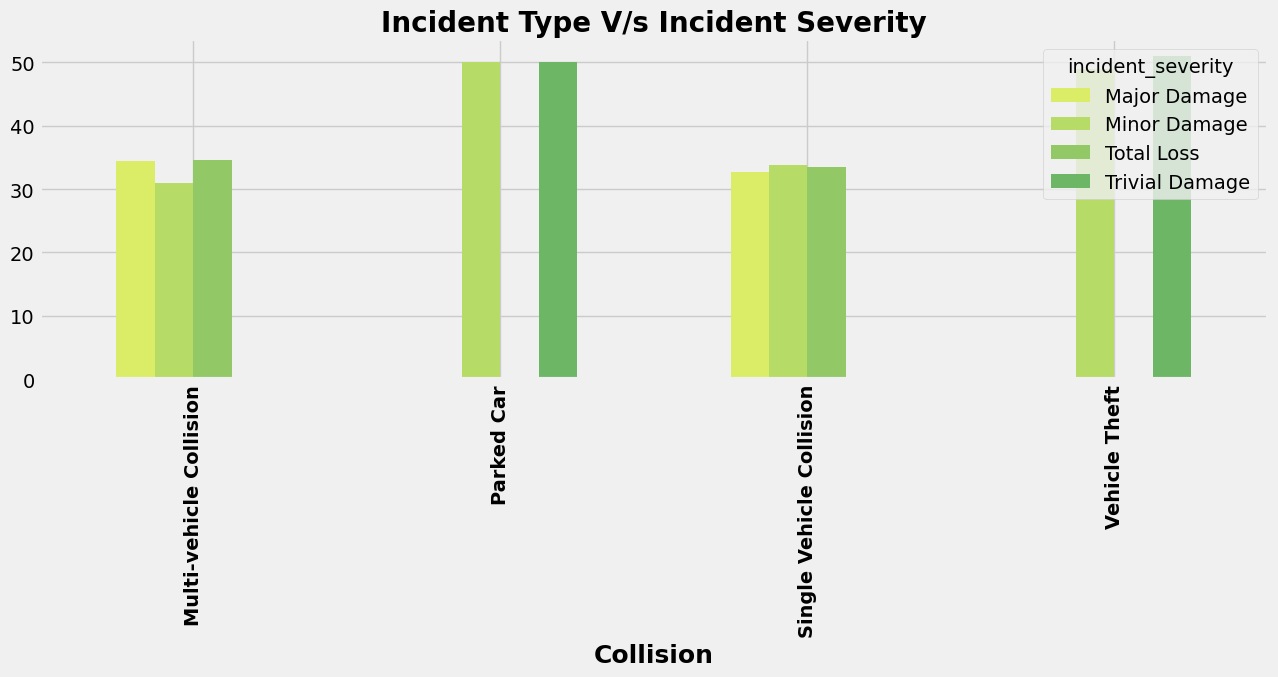

In [44]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.set_palette('summer_r')
table = pd.crosstab(data['incident_type'],data['incident_severity'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar')
plt.title("Incident Type V/s Incident Severity",fontsize = 20,fontweight='bold')
plt.xlabel('Collision',fontsize = 18, fontweight = 'bold')
plt.xticks(fontsize = 14,fontweight = 'bold')
plt.show()

# It seems like incident Type is important variable for us. Now is time to dive deep to get more insights on incident type with Numerical features

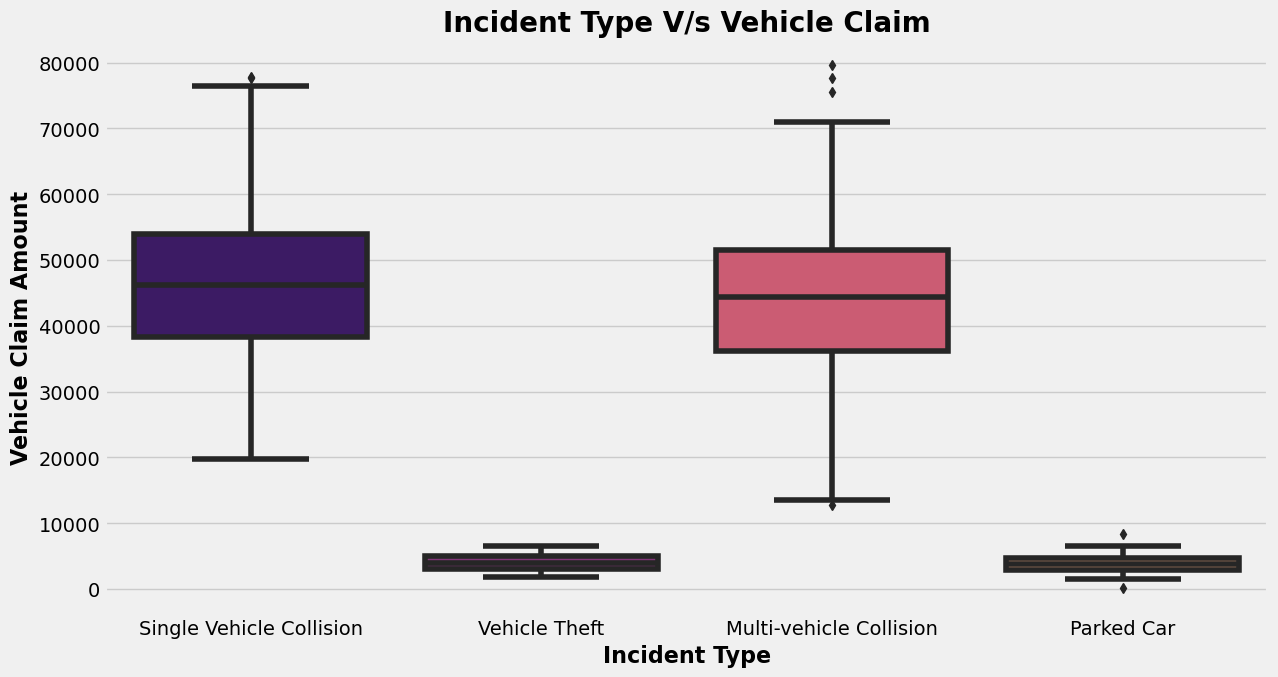

In [45]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.boxplot(x='incident_type',y= 'vehicle_claim',data=data, palette='magma')
plt.title("Incident Type V/s Vehicle Claim",fontsize = 20,fontweight='bold')
plt.xlabel('Incident Type',fontsize = 16, fontweight = 'bold')
plt.ylabel("Vehicle Claim Amount",fontsize = 16,fontweight = 'bold')
plt.show()

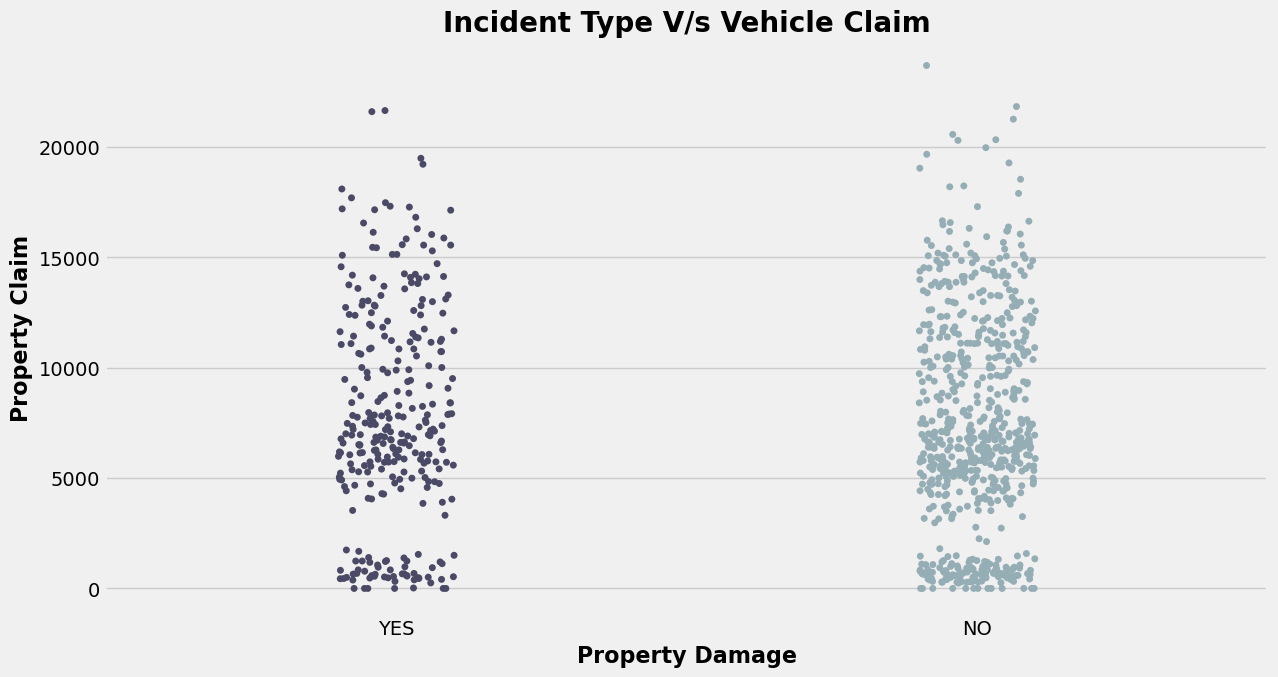

In [46]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.stripplot(x='property_damage',y= 'property_claim',data=data, palette='bone')
plt.title("Incident Type V/s Vehicle Claim",fontsize = 20,fontweight='bold')
plt.xlabel('Property Damage',fontsize = 16, fontweight = 'bold')
plt.ylabel("Property Claim",fontsize = 16,fontweight = 'bold')
plt.show()

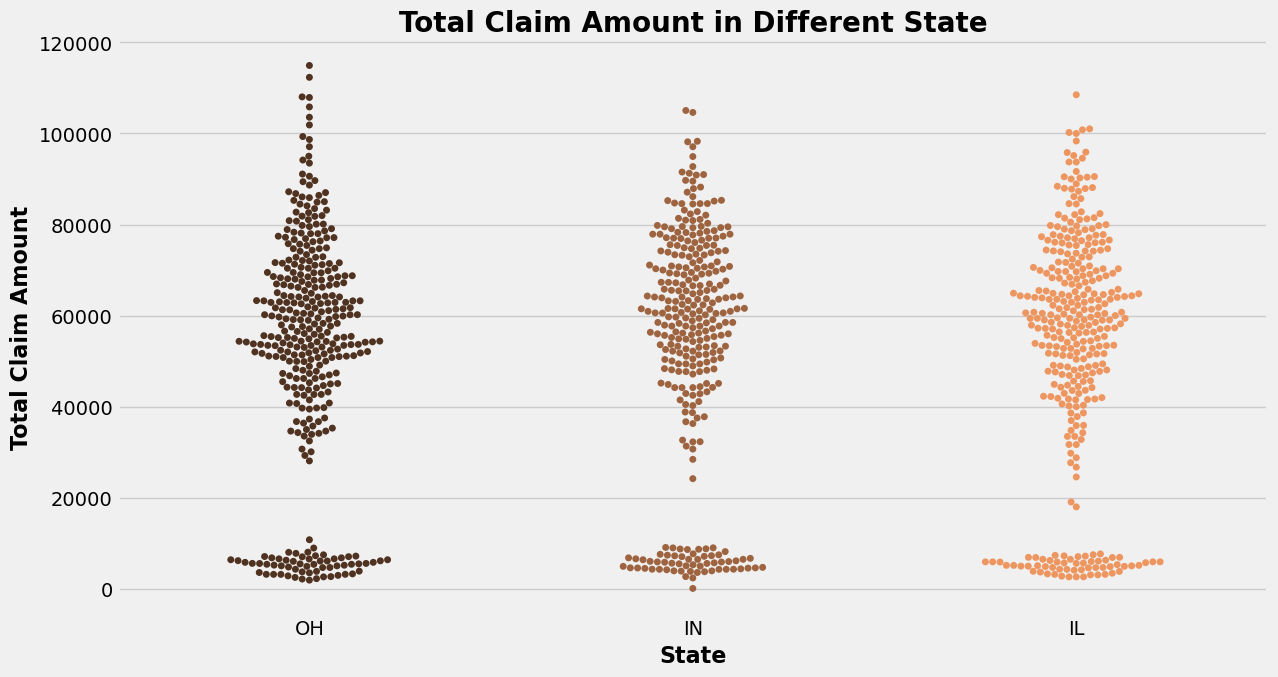

In [47]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.swarmplot(x='policy_state',y= 'total_claim_amount',data=data, palette='copper')
plt.title("Total Claim Amount in Different State",fontsize = 20,fontweight='bold')
plt.xlabel('State',fontsize = 16, fontweight = 'bold')
plt.ylabel("Total Claim Amount",fontsize = 16,fontweight = 'bold')
plt.show()

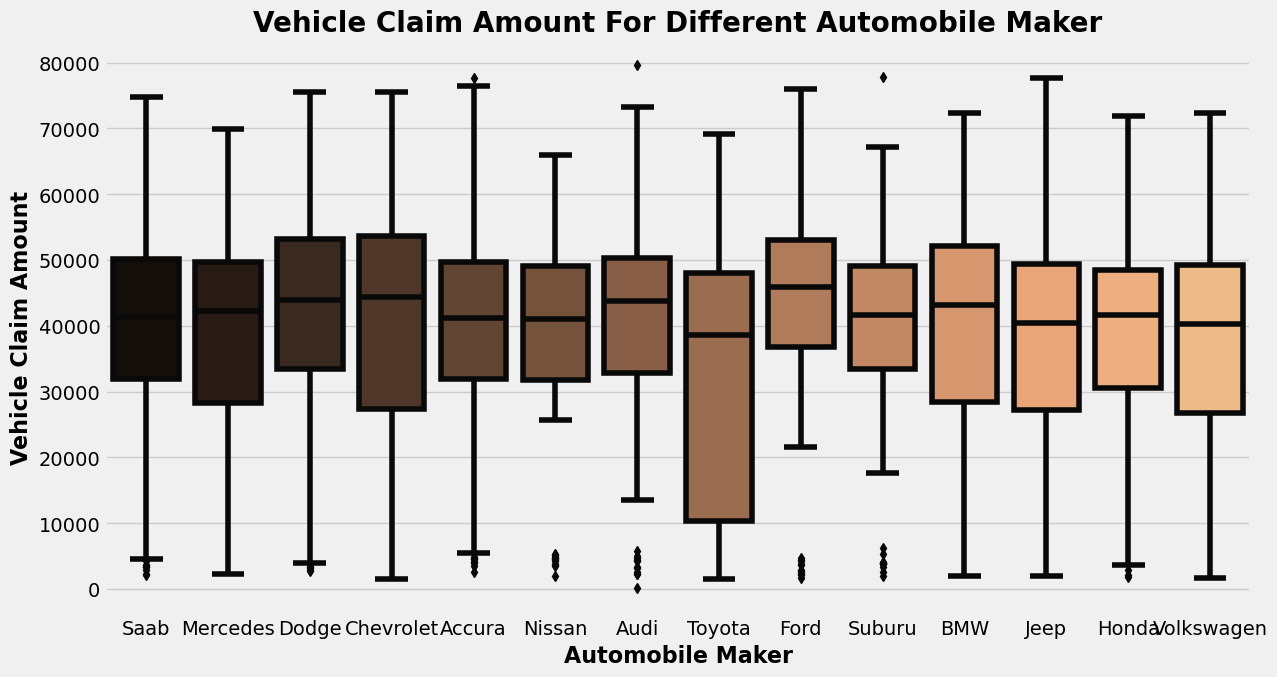

In [48]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.boxplot(x='auto_make',y= 'vehicle_claim',data=data, palette='copper')
plt.title("Vehicle Claim Amount For Different Automobile Maker",fontsize = 20,fontweight='bold')
plt.xlabel('Automobile Maker',fontsize = 16, fontweight = 'bold')
plt.ylabel("Vehicle Claim Amount",fontsize = 16,fontweight = 'bold')
plt.show()

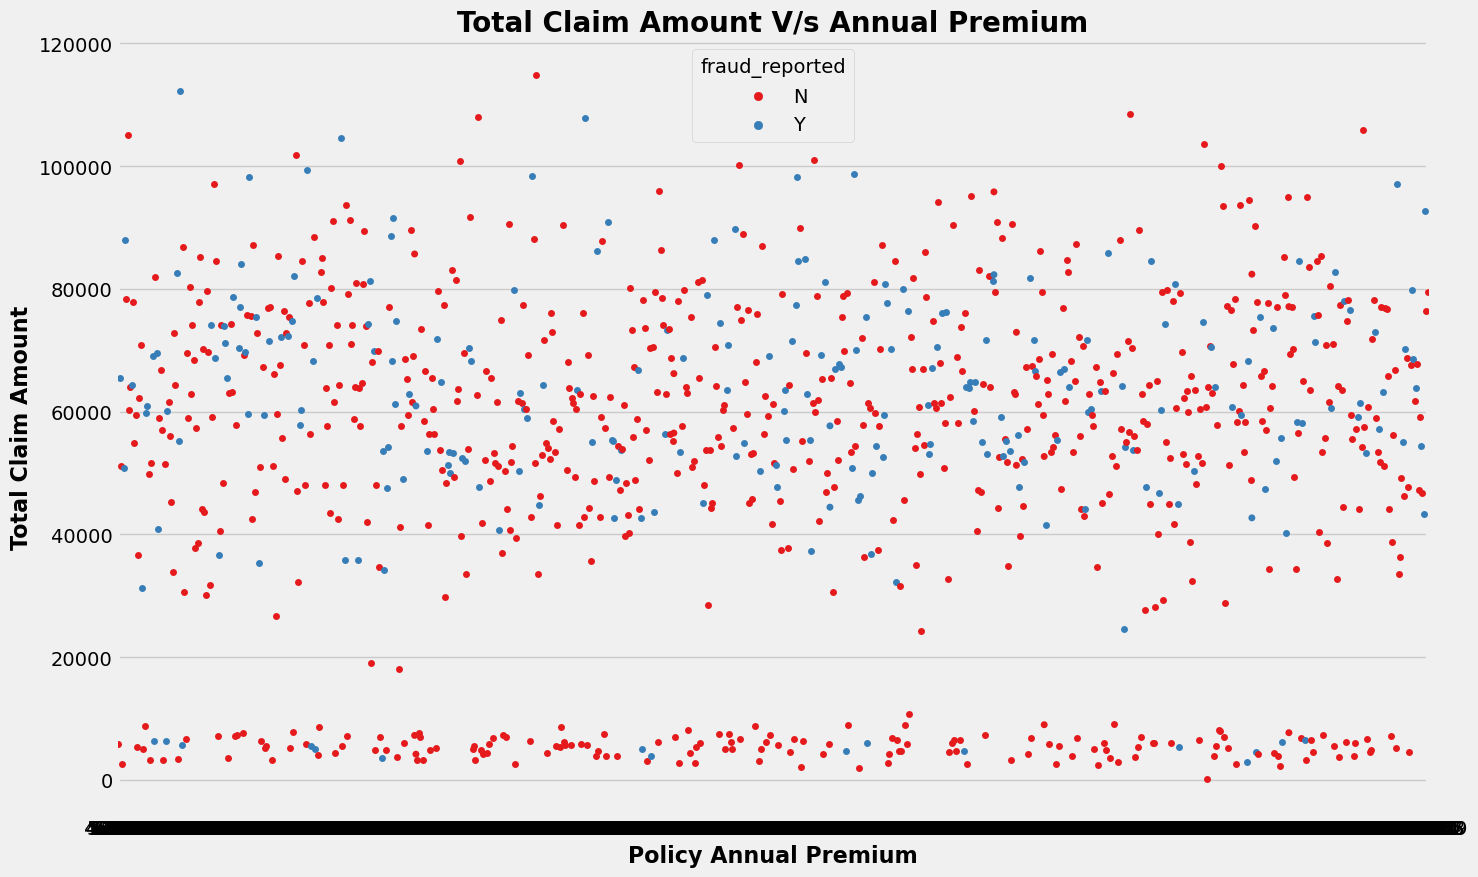

In [49]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.swarmplot(x='policy_annual_premium',y= 'total_claim_amount',data=data,hue = data.fraud_reported, palette='Set1')
plt.title("Total Claim Amount V/s Annual Premium",fontsize = 20,fontweight='bold')
plt.xlabel('Policy Annual Premium',fontsize = 16, fontweight = 'bold')
plt.ylabel("Total Claim Amount",fontsize = 16,fontweight = 'bold')
plt.show()

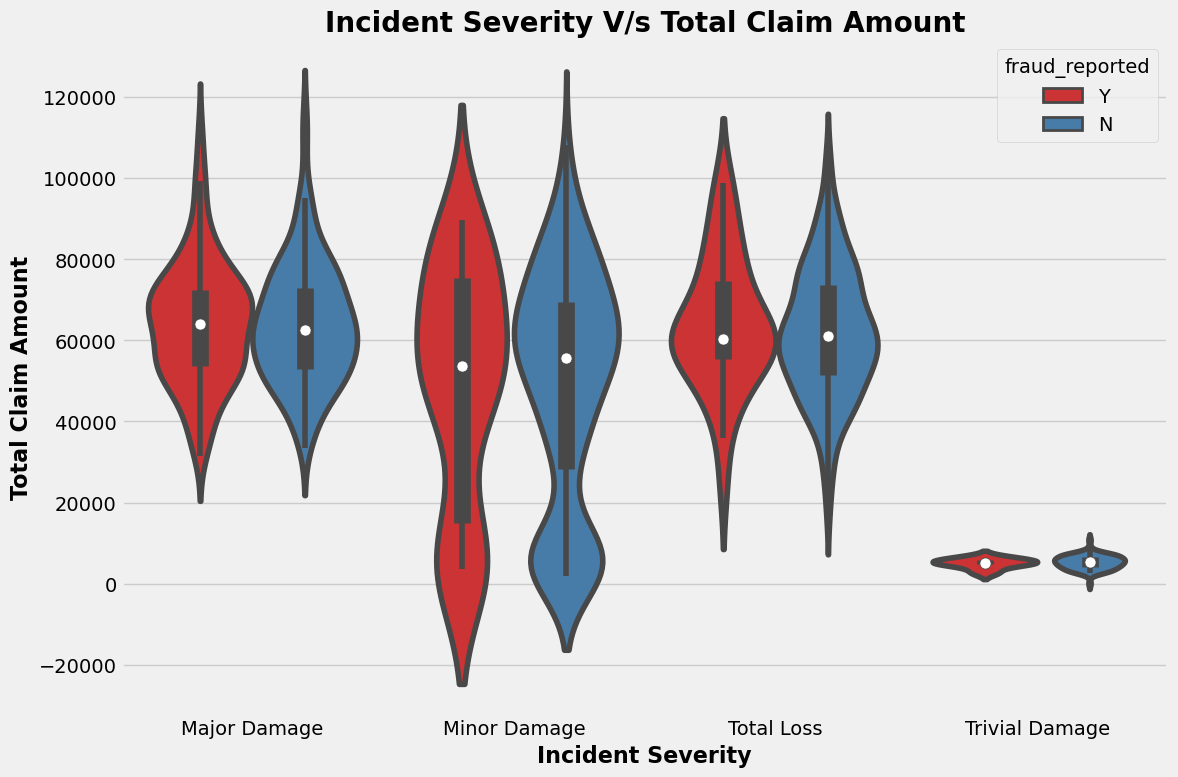

In [50]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,8)
sns.violinplot(x='incident_severity',y= 'total_claim_amount',data=data,hue=data.fraud_reported, palette='Set1')
plt.title("Incident Severity V/s Total Claim Amount",fontsize = 20,fontweight='bold')
plt.xlabel('Incident Severity',fontsize = 16, fontweight = 'bold')
plt.ylabel("Total Claim Amount",fontsize = 16,fontweight = 'bold')
plt.show()

In [51]:
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns.
data.head()

months_as_customer  age policy_state  policy_deductable  \
0                 328   48           OH               1000   
1                 228   42           IN               2000   
2                 134   29           OH               2000   
3                 256   41           IL               2000   
4                 228   44           IL               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation insured_hobbies insured_relationship  capital-gains  \
0       craft-repair        sleeping              husband          53300   
1  machine-op-inspct         reading       other-relative              0   
2              sales     board-games            own-child          35100   
3       armed-forces     board-games            unmarried          48900   
4              sales     board-games            unmarried          66000   

   capital-loss             incident_type   collision_type incident_severity  \
0             0  Single Vehicle Collision   Side Collision      Major Damage   
1             0             Vehicle Theft   Rear Collision      Minor Damage   
2             0   Multi-vehicle Collision   Rear Collision      Minor Damage   
3        -62400  Single Vehicle Collision  Front Collision      Major Damage   
4        -46000             Vehicle Theft   Rear Collision      Minor Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   
2                Police             NY      Columbus   
3                Police             OH     Arlington   
4                  None             NY     Arlington   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1              NO   
2                         7                            3              NO   
3                         5                            1              NO   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                      NO                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             650           4550     Accura        RSX   

  fraud_reported CSL_Personal CSL_Accidental  policy_bind_day  \
0              Y          250            500               17   
1              Y          250            500               27   
2              N          100            300                9   
3              Y          250            500               25   
4              N          500           1000                6   

   policy_bind_month  policy_bind_year  incident_day  incident_month  \
0                 10              2014            25      

# Encoding Categorial Data

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    data[i]=le.fit_transform(data[i])
data.head()

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48             2               1000   
1                 228   42             1               2000   
2                 134   29             2               2000   
3                 256   41             0               2000   
4                 228   44             0               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            1   
1                1197.22         5000000            1   
2                1413.14         5000000            0   
3                1415.74         6000000            0   
4                1583.91         6000000            1   

   insured_education_level  insured_occupation  insured_hobbies  \
0                        4                   2               17   
1                        4                   6               15   
2                        6                  11                2   
3                        6                   1                2   
4                        0                  11                2   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0                     0          53300             0              2   
1                     2              0             0              3   
2                     3          35100             0              0   
3                     4          48900        -62400              2   
4                     4          66000        -46000              3   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0               2                  0                      4               4   
1               1                  1                      4               5   
2               1                  1                      4               1   
3               0                  0                      4               2   
4               1                  1                      2               1   

   incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0              1                         5                            1   
1              5                         8                            1   
2              1                         7                            3   
3              0                         5                            1   
4              0                        20                            1   

   property_damage  bodily_injuries  witnesses  police_report_available  \
0                1                1          2                        1   
1                0                0          0                        0   
2                0                2          3                        0   
3                0                1          2                        0   
4                0                0          1                        0   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0               71610          6510           13020          52080         10   
1                5070           780             780           3510          8   
2               34650          7700            3850          23100          4   
3               63400          6340            6340          50720          3   
4                6500          1300             650           4550          0   

   auto_model  fraud_reported  CSL_Personal  CSL_Accidental  policy_bind_day  \
0           1               1             1               2               17   
1          12               1             1               2               27   
2          30               0             0               1                9   
3          34               1             1               2               25   
4          31               0             2               0                6   

   policy_bind_month  policy_bind_year  incident_day  incident_month  \
0                 10              

# Feature Selection and Engineering

Outlier detection and removal

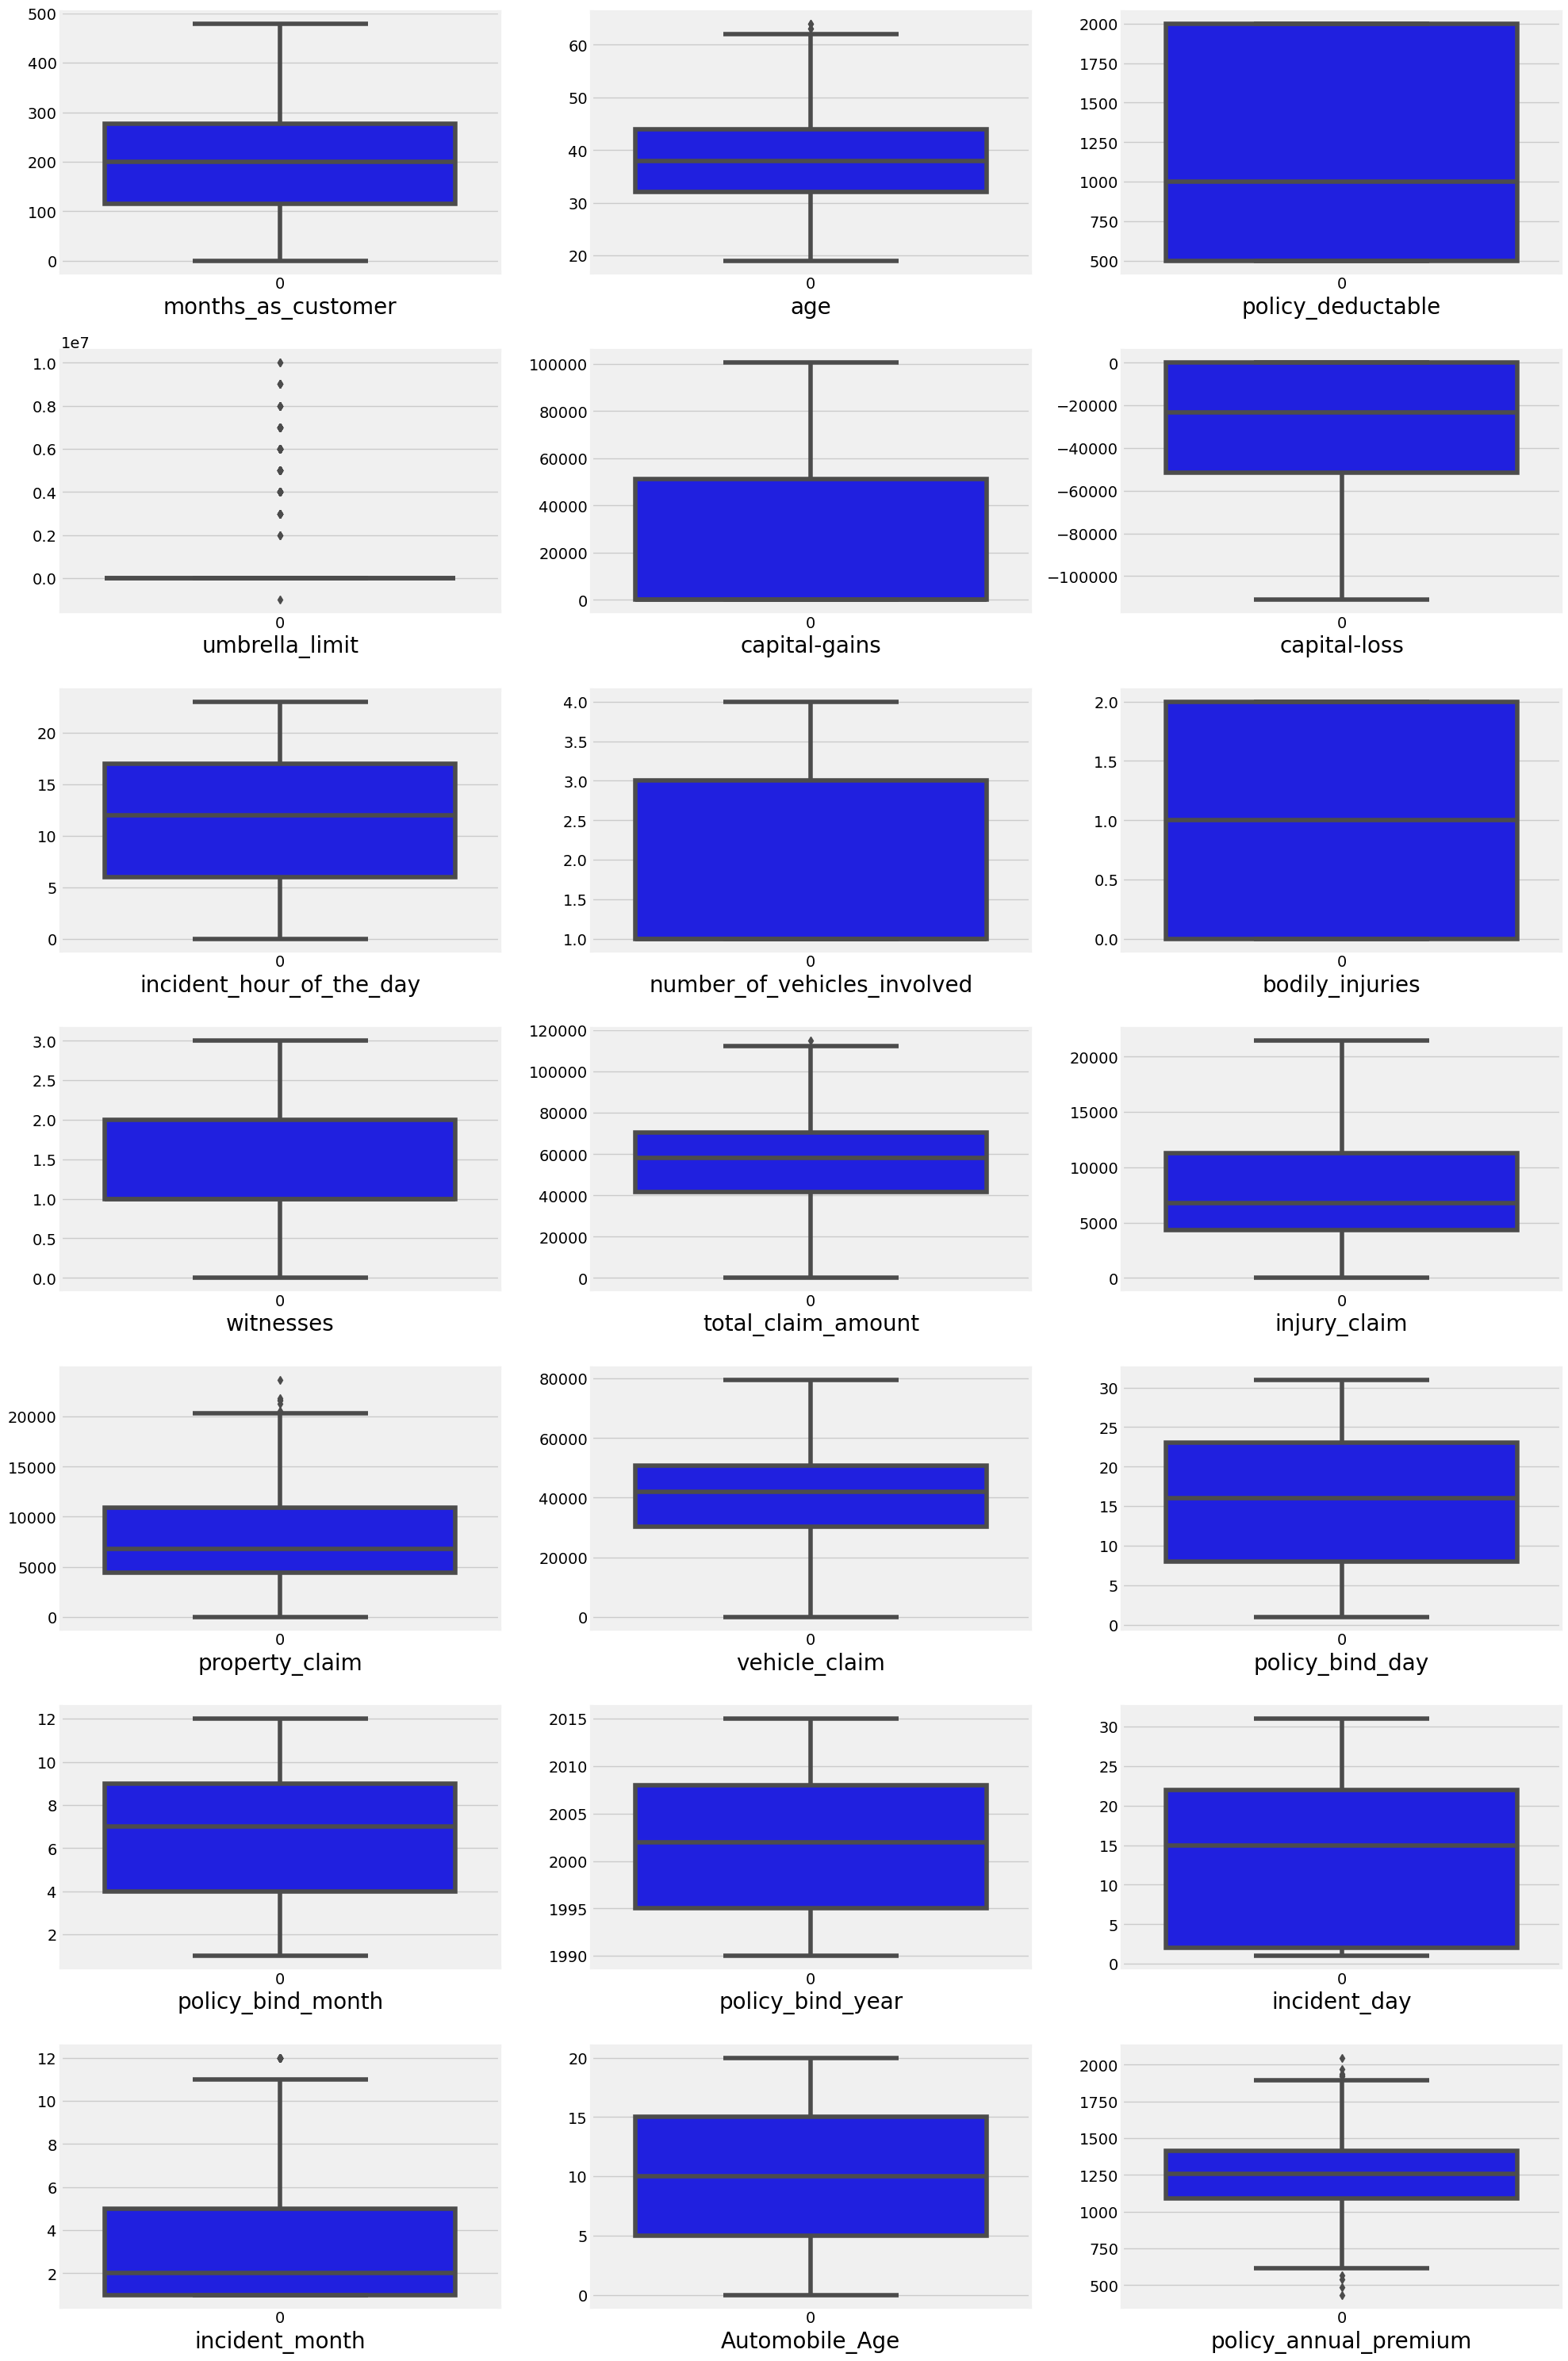

In [53]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1
for column in Numerical:
    if plotnumber <=21:
        ax = plt.subplot(7,3, plotnumber)
        sns.boxplot(data[column],color='b')
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.show()

**From Boxplot we can see outlier exist dataset.**

In [54]:
data.drop('age_group',axis=1,inplace=True)

In [55]:
data.head()

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48             2               1000   
1                 228   42             1               2000   
2                 134   29             2               2000   
3                 256   41             0               2000   
4                 228   44             0               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            1   
1                1197.22         5000000            1   
2                1413.14         5000000            0   
3                1415.74         6000000            0   
4                1583.91         6000000            1   

   insured_education_level  insured_occupation  insured_hobbies  \
0                        4                   2               17   
1                        4                   6               15   
2                        6                  11                2   
3                        6                   1                2   
4                        0                  11                2   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0                     0          53300             0              2   
1                     2              0             0              3   
2                     3          35100             0              0   
3                     4          48900        -62400              2   
4                     4          66000        -46000              3   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0               2                  0                      4               4   
1               1                  1                      4               5   
2               1                  1                      4               1   
3               0                  0                      4               2   
4               1                  1                      2               1   

   incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0              1                         5                            1   
1              5                         8                            1   
2              1                         7                            3   
3              0                         5                            1   
4              0                        20                            1   

   property_damage  bodily_injuries  witnesses  police_report_available  \
0                1                1          2                        1   
1                0                0          0                        0   
2                0                2          3                        0   
3                0                1          2                        0   
4                0                0          1                        0   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0               71610          6510           13020          52080         10   
1                5070           780             780           3510          8   
2               34650          7700            3850          23100          4   
3               63400          6340            6340          50720          3   
4                6500          1300             650           4550          0   

   auto_model  fraud_reported  CSL_Personal  CSL_Accidental  policy_bind_day  \
0           1               1             1               2               17   
1          12               1             1               2               27   
2          30               0             0               1                9   
3          34               1             1               2               25   
4          31               0             2               0                6   

   policy_bind_month  policy_bind_year  incident_day  incident_month  \
0                 10              

**Z-Score**

In [56]:
from scipy.stats import zscore
z = np.abs(zscore(data))
threshold = 3
df = data[(z<3).all(axis = 1)]
print("Shape of the dataframe before removing outliers: ",data.shape)
print("Shape of the dataframe after removing outliers: ",df.shape)


Shape of the dataframe before removing outliers:  (1000, 40)
Shape of the dataframe after removing outliers:  (980, 40)


In [57]:
data = df.copy()

# Skewness of features

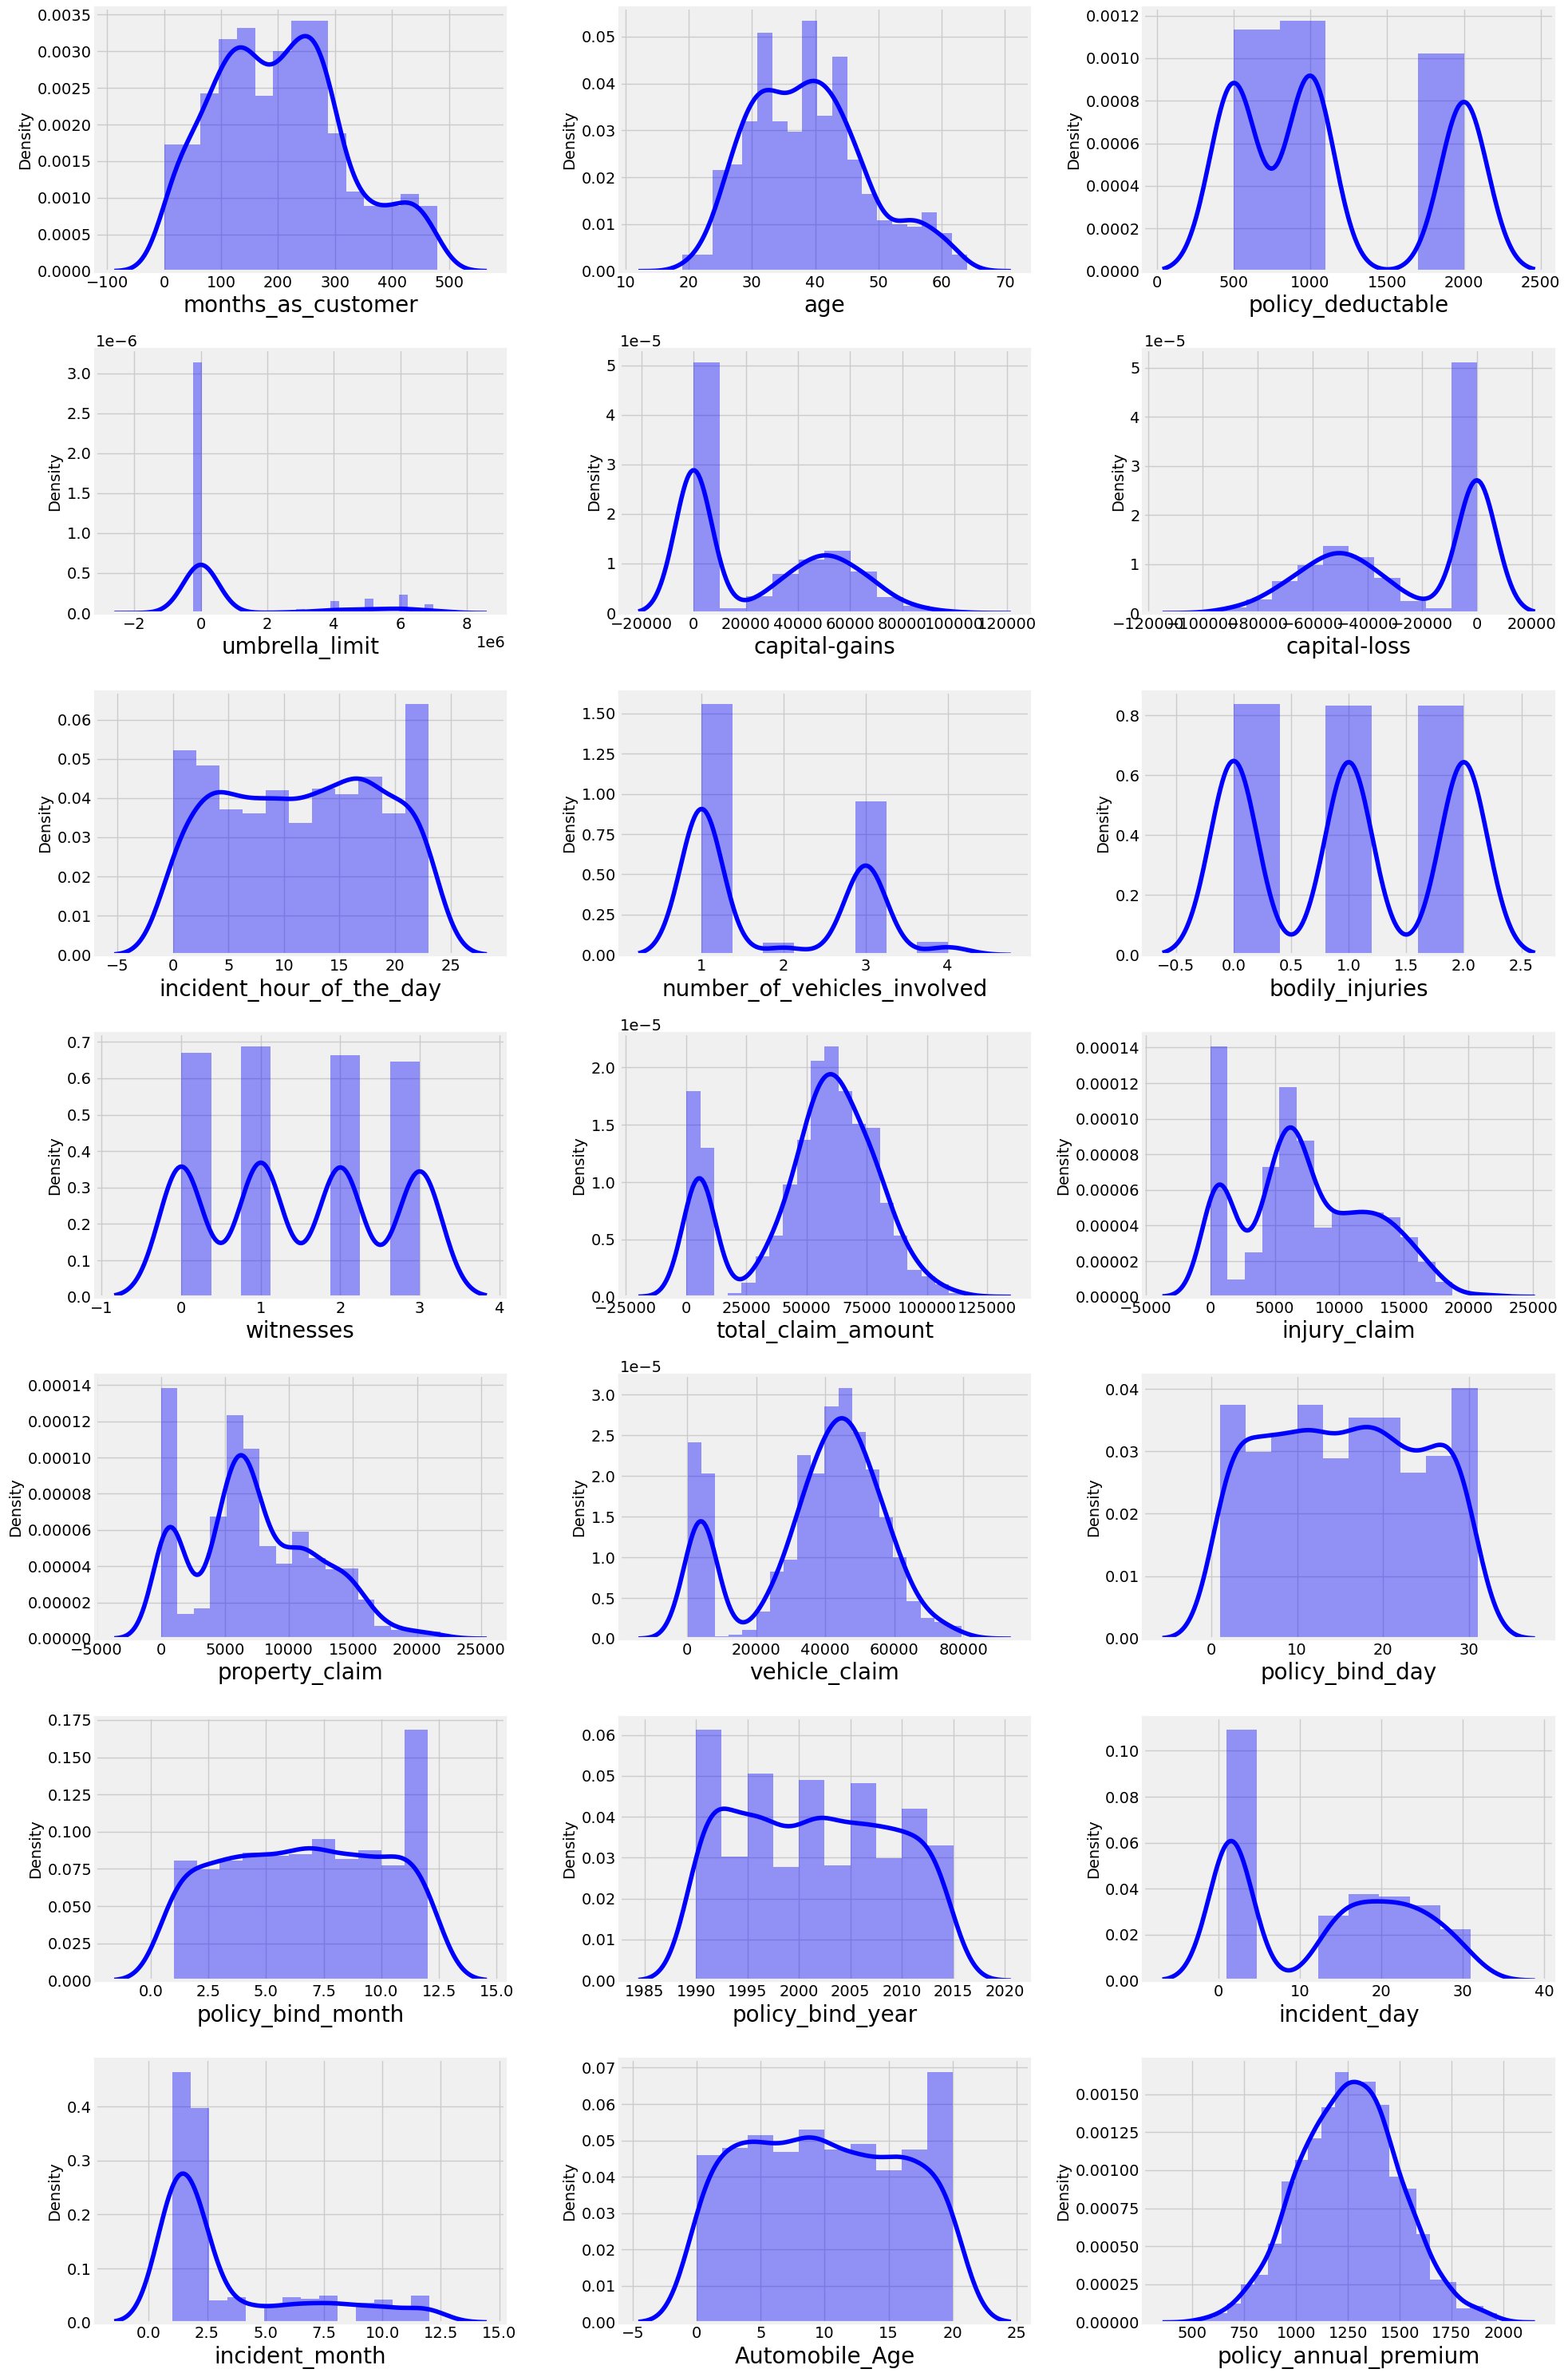

In [58]:
plt.figure(figsize=(20,30),facecolor='white')
plotnum=1
for col in Numerical:
    if plotnum<=21:
        plt.subplot(7,3,plotnum)
        sns.distplot(data[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

**Skewness is important features for continous data. There is no relevence of skewness for discrete numerical feature like month and categorical features. So we gone ignore skewness present in discrete numerical and categorial features.**

- **We also going to ignore skewness in target features.**

In [59]:
data[Numerical].skew()

months_as_customer             0.362608
age                            0.475385
policy_deductable              0.476090
umbrella_limit                 1.801424
capital-gains                  0.466619
capital-loss                  -0.376884
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
bodily_injuries                0.003757
witnesses                      0.026211
total_claim_amount            -0.593593
injury_claim                   0.271759
property_claim                 0.361356
vehicle_claim                 -0.620936
policy_bind_day                0.028152
policy_bind_month             -0.024643
policy_bind_year               0.065022
incident_day                   0.055443
incident_month                 1.388336
Automobile_Age                 0.054522
policy_annual_premium          0.035964
dtype: float64

- Out of above features 'umbrella_limit','total_claim_amount' and 'vehicle_claim' are continous variable with skew data. The variable 'incident_month' is skewed but it is discrte in nature.So ignore it.

- We will use yeo-johnson mehtod to transform negatively skewed data.

In [60]:
skew = ['total_claim_amount','vehicle_claim']
#import powertransformer
from sklearn.preprocessing import PowerTransformer
scaler= PowerTransformer(method='yeo-johnson')
data[skew] = scaler.fit_transform(data[skew].values)

# Checking skewness after transformation

In [61]:
data[skew].skew()

total_claim_amount   -0.508540
vehicle_claim        -0.521805
dtype: float64

**For 'total_claim_amount','vehicle_claim' skewness has not been removed but reduced it.**

# Correlation

In [62]:
data.corr()

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922960     -0.007183   
age                                    0.922960  1.000000     -0.020012   
policy_state                          -0.007183 -0.020012      1.000000   
policy_deductable                      0.031041  0.032036      0.017612   
policy_annual_premium                 -0.003814  0.005330      0.015089   
umbrella_limit                         0.018213  0.013256     -0.010921   
insured_sex                            0.059644  0.073790     -0.018002   
insured_education_level               -0.000731  0.001647     -0.027173   
insured_occupation                     0.006925  0.014798     -0.025357   
insured_hobbies                       -0.089358 -0.079099     -0.039501   
insured_relationship                   0.071492  0.076129     -0.017060   
capital-gains                          0.007468 -0.004529      0.068619   
capital-loss                           0.023041  0.012860     -0.031926   
incident_type                         -0.016746 -0.026286      0.032373   
collision_type                        -0.073031 -0.076325      0.049961   
incident_severity                     -0.064094 -0.064396     -0.028353   
authorities_contacted                  0.013782  0.018441     -0.014647   
incident_state                         0.015811  0.012644      0.019456   
incident_city                         -0.006601 -0.006685     -0.002809   
incident_hour_of_the_day               0.066198  0.083720      0.021926   
number_of_vehicles_involved            0.011831  0.020391     -0.045514   
property_damage                       -0.000630 -0.008239     -0.013576   
bodily_injuries                       -0.007674 -0.012254      0.012097   
witnesses                              0.063574  0.056360      0.025838   
police_report_available               -0.017200 -0.018135      0.065316   
total_claim_amount                     0.059338  0.068448     -0.015056   
injury_claim                           0.065062  0.077149     -0.048188   
property_claim                         0.036660  0.062375     -0.006420   
vehicle_claim                          0.056360  0.059129     -0.006411   
auto_make                              0.049734  0.033757      0.010259   
auto_model                             0.005130  0.015322     -0.018008   
fraud_reported                         0.021285  0.013279      0.034587   
CSL_Personal                          -0.021855 -0.013323      0.001653   
CSL_Accidental                         0.007121  0.011258      0.029007   
policy_bind_day                        0.050824  0.053147     -0.000583   
policy_bind_month                      0.004207  0.014492      0.073692   
policy_bind_year                      -0.041914 -0.031709     -0.003045   
incident_day                          -0.010538 -0.005843      0.016049   
incident_month                         0.019242  0.018221      0.027889   
Automobile_Age                        -0.000869 -0.005594      0.001160   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.031041              -0.003814   
age                                   0.032036               0.005330   
policy_state                          0.017612               0.015089   
policy_deductable                     1.000000              -0.008300   
policy_annual_premium                -0.008300               1.000000   
umbrella_limit                        0.013471              -0.014107   
insured_sex                          -0.006977               0.041312   
insured_education_level               0.014101              -0.021400   
insured_occupation                   -0.053888               0.027827   
insured_hobbies                      -0.001923              -0.014226   
insured_relationship                 -0.019000               0.004417   
capital-gains                         0.031673              -0.006807   
capi

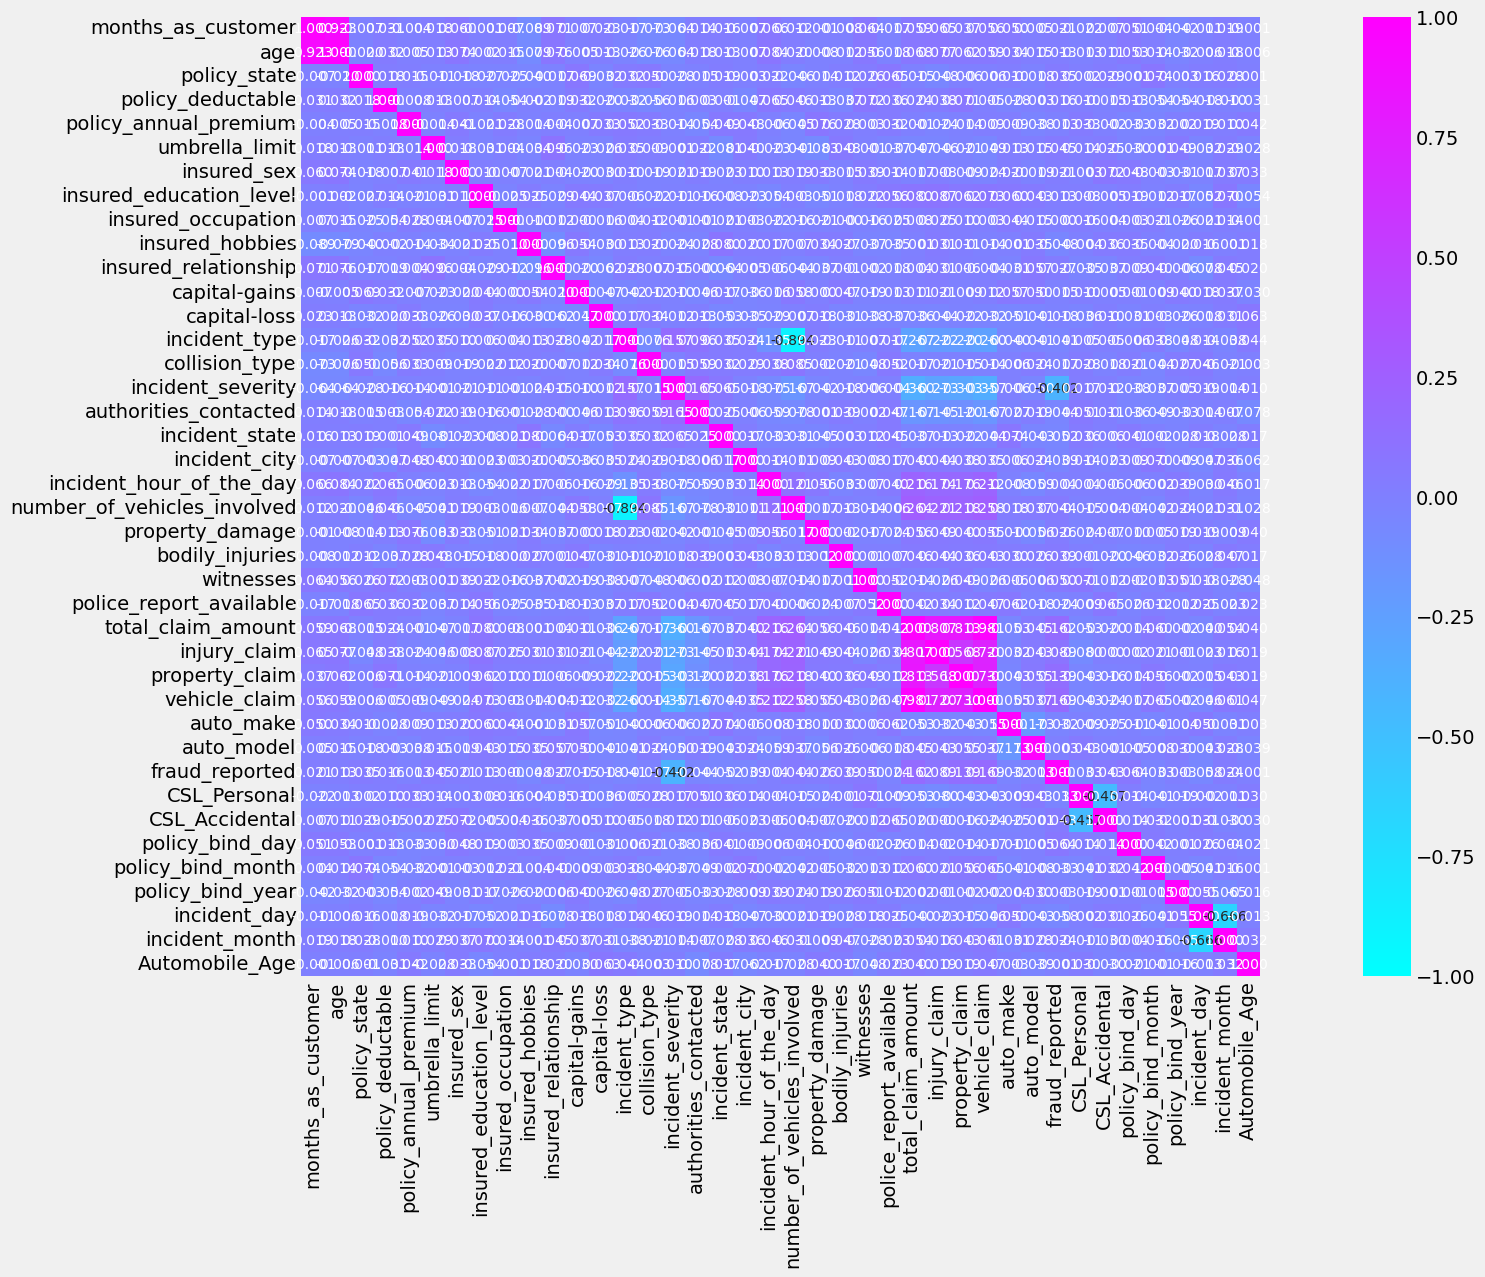

In [63]:
plt.figure(figsize=(21,13))
sns.heatmap(data.corr(),vmin=-1, vmax=1,annot=True, square=True, fmt='0.3f',
           annot_kws={'size':10}, cmap = "cool")
plt.show()

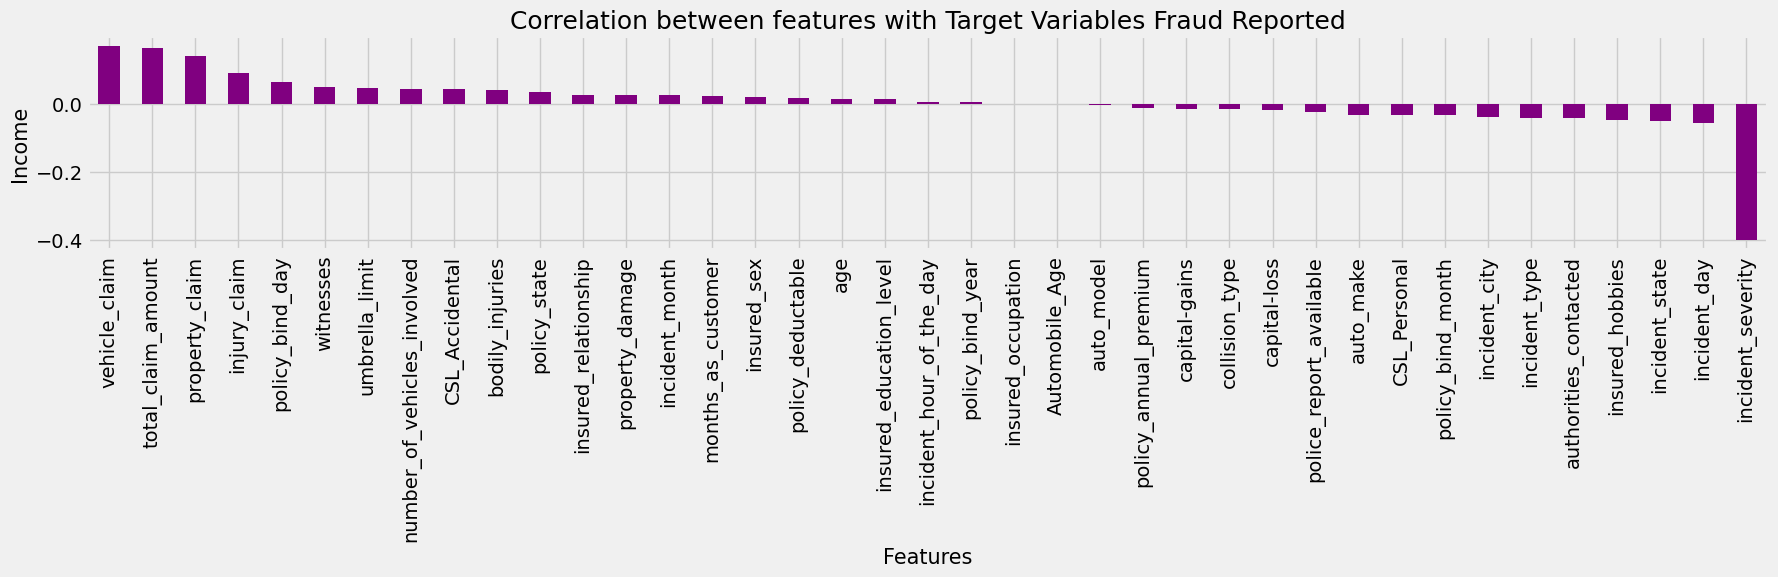

In [64]:
plt.figure(figsize=(18,6))
data.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='purple')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize = 15)
plt.title('Correlation between features with Target Variables Fraud Reported', fontsize = 18)
plt.show()

**Observation-:**

- incedently_severity is correlated with target variables with correlation of 0.4. Other variable are poorly correlated with target variable.
- Other Variables are poorly correlated with target variables.
- Injury claim, property_claim, vehicle_claim is highly correlated with other.

# Balancing Imbalanced target Features

In [65]:
data.fraud_reported.value_counts()

0    740
1    240
Name: fraud_reported, dtype: int64

**As target variable is imbalanced in nature we will need to balance target variable.**

# Balacing using SMOTE

In [66]:
from imblearn.over_sampling import SMOTE

In [67]:
# spliting data in target and dependent features
x = data.drop(['fraud_reported'],axis = 1)
y = data['fraud_reported']

In [68]:
# oversampling using SMOTE Techniques
oversample = SMOTE()
x,y = oversample.fit_resample(x,y)

In [69]:
y.value_counts()

1    740
0    740
Name: fraud_reported, dtype: int64

Now, we will resloved all class imbalaced problems and all the categorial have same data ensuring that the ML model does not get biased towords one category

# Standard Scaling

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

# Checking Multicollinearity between features using variance_inflation_factor

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scale,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

VIF                     Features
0       7.183958           months_as_customer
1       7.181222                          age
2       1.068377                 policy_state
3       1.057768            policy_deductable
4       1.051757        policy_annual_premium
5       1.052870               umbrella_limit
6       1.078076                  insured_sex
7       1.061651      insured_education_level
8       1.036164           insured_occupation
9       1.073766              insured_hobbies
10      1.065265         insured_relationship
11      1.071715                capital-gains
12      1.069929                 capital-loss
13      3.867220                incident_type
14      1.099051               collision_type
15      1.373072            incident_severity
16      1.117383        authorities_contacted
17      1.075967               incident_state
18      1.057875                incident_city
19      1.119462     incident_hour_of_the_day
20      3.699225  number_of_vehicles_involved
21      1.059696              property_damage
22      1.056986              bodily_injuries
23      1.073503                    witnesses
24      1.105700      police_report_available
25  43141.291664           total_claim_amount
26   1719.403198                 injury_claim
27   1705.776211               property_claim
28  21456.577997                vehicle_claim
29      1.092273                    auto_make
30      1.099370                   auto_model
31      1.222659                 CSL_Personal
32      1.216511               CSL_Accidental
33      1.037213              policy_bind_day
34      1.059009            policy_bind_month
35      1.045176             policy_bind_year
36      1.848320                 incident_day
37      1.862060               incident_month
38      1.076537               Automobile_Age

**We will go by second way for further investigation. As for some independent features VIF is exceed permisible limit of 10.**

# PCA

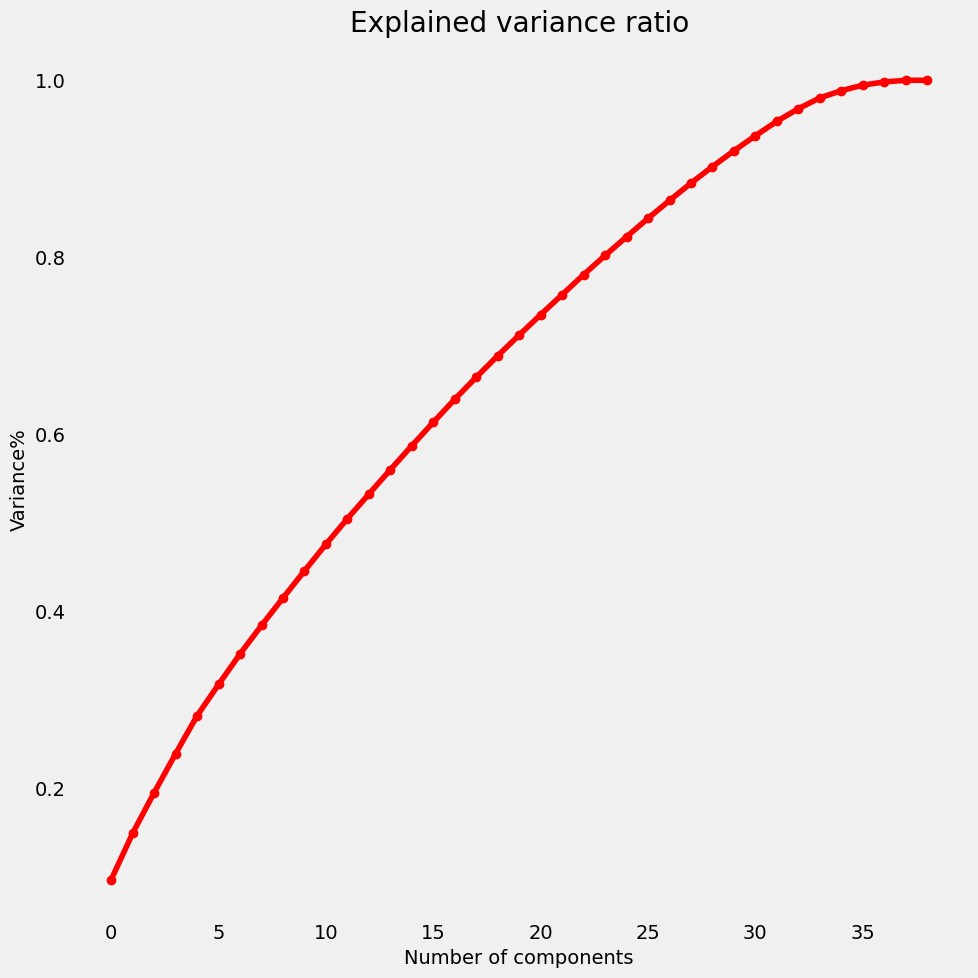

In [72]:
from sklearn.decomposition import PCA
pca = PCA()
# plot the graph to find the principal components
x_pca = pca.fit_transform(x_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of components')
plt.ylabel('Variance%')
plt.title("Explained variance ratio")
plt.grid()

In [73]:
pca_new = PCA(n_components=28)
x_new = pca_new.fit_transform(x_scale)

In [74]:
pri_x = pd.DataFrame(x_new, columns=np.arange(28))

# Mahine Learning and Model Building 

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier


In [76]:
x_train,x_test,y_train,y_test = train_test_split(pri_x,y,test_size=.3, random_state=99)
print('Training feature matrix size:', x_train.shape)
print('Training target vector :',y_train.shape)
print('Test feature matrix size :',x_test.shape)
print('Test target vector size :', y_test.shape)

Training feature matrix size: (1036, 28)
Training target vector : (1036,)
Test feature matrix size : (444, 28)
Test target vector size : (444,)


# Finding Best Random State

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
maxAccu=0
maxRs=0
for i in range (1,250):
    x_train,x_test,y_train,y_test= train_test_split(pri_x,y,test_size = 0.3, random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu, 'on Random_state',maxRS)

Best accuracy is 0.8040540540540541 on Random_state 187


# Logistic Regression

In [78]:
x_train,x_test,y_train,y_test = train_test_split(pri_x,y,test_size=.3,random_state=9)
lrr = LogisticRegression()
lrr.fit(x_train,y_train)
y_pred = lrr.predict(x_test)
print("Logistic Regression Evaluation")
print('\n')
print("Accuracy Score Of Logistic Regression : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix Of Logistic Regression : ",confusion_matrix(y_test,y_pred))
print("Classification Report Of Logistic Regression : ", classification_report(y_test,y_pred))

Logistic Regression Evaluation


Accuracy Score Of Logistic Regression :  0.795045045045045
Confusion Matrix Of Logistic Regression :  [[176  51]
 [ 40 177]]
Classification Report Of Logistic Regression :                precision    recall  f1-score   support

           0       0.81      0.78      0.79       227
           1       0.78      0.82      0.80       217

    accuracy                           0.80       444
   macro avg       0.80      0.80      0.80       444
weighted avg       0.80      0.80      0.80       444



# Cross valiation

In [79]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(lrr, x,y,cv=5)
print("Cross Validation Score",lrr)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score LogisticRegression()
CVS Score :  [0.55405405 0.51689189 0.50675676 0.55405405 0.56756757]
Mean CVS Score :  0.539864864864865
Std Deviation :  0.02363899416829174


# Applying Other ML Classifier Algorithm

In [80]:
models =[
    SVC(),
    DecisionTreeClassifier(),
    ExtraTreesClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    BaggingClassifier()]

for m in models:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' + '\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :' + '\033[0m\n',accuracy_score(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Confusion Matrix' + '\033[0m \n',confusion_matrix(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Classification Report' + '\033[0m \n',classification_report(y_test,y_pred))
    print('\n')
    print('===================================================================================================================')

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8243243243243243


Confusion Matrix 
 [[191  36]
 [ 42 175]]


Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       227
           1       0.83      0.81      0.82       217

    accuracy                           0.82       444
   macro avg       0.82      0.82      0.82       444
weighted avg       0.82      0.82      0.82       444



Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score :
 0.7004504504504504


Confusion Matrix 
 [[155  72]
 [ 61 156]]


Classification Report 
               precision    recall  f1-score   support

           0       0.72      0.68      0.70       227
           1       0.68      0.72      0.70       217

    accuracy                           0.70       444
   macro avg       0.70      0.70      0.70       444
weighted avg       0.70      0.70      0.70       44

# Cross Validation Score

In [81]:
from sklearn.model_selection import cross_val_score
model =[
    SVC(),
    DecisionTreeClassifier(),
    ExtraTreesClassifier(),
    KNeighborsClassifier(n_neighbors=12),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    BaggingClassifier()]
for c in model:
    score = cross_val_score(c,x,y, cv=5)
    print('\n')
    print('\033[1m'+'Cross Validation Score',c,'is' + '\033[0m')
    print("Score",score)
    print("Mean Score :",score.mean())
    print("Std Deviation", score.std())
    print('\n')
    print('=====================================================================================================================')



Cross Validation Score SVC() is
Score [0.52027027 0.50675676 0.50675676 0.53716216 0.55067568]
Mean Score : 0.5243243243243244
Std Deviation 0.017279340341276223




Cross Validation Score DecisionTreeClassifier() is
Score [0.73310811 0.75       0.81756757 0.89527027 0.87162162]
Mean Score : 0.8135135135135135
Std Deviation 0.06415005919685363




Cross Validation Score ExtraTreesClassifier() is
Score [0.70945946 0.80743243 0.91891892 0.92567568 0.93918919]
Mean Score : 0.8601351351351353
Std Deviation 0.0888609849879654




Cross Validation Score KNeighborsClassifier(n_neighbors=12) is
Score [0.67567568 0.65540541 0.65202703 0.70608108 0.69932432]
Mean Score : 0.6777027027027026
Std Deviation 0.022060577996370966




Cross Validation Score RandomForestClassifier() is
Score [0.73986486 0.81418919 0.90202703 0.92567568 0.91891892]
Mean Score : 0.8601351351351351
Std Deviation 0.0722246414408801




Cross Validation Score AdaBoostClassifier() is
Score [0.65878378 0.76013514 0.875      

# Hyper-Parameter Tunning: GridSearchCV-:

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
param = [{'n_estimators':[100,200,300,400],
         'criterion':['gini','entropy'],
         'max_depth':[10,20,30],
         'max_features':['auto','log2','sqrt'],
          'min_samples_split':[3,5,8,11]
         }]

In [84]:
gc = GridSearchCV(ExtraTreesClassifier(),param,verbose=10)
gc.fit(x_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 1/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 2/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 3/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 4/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [10, 20, 30],
                          'max_features': ['auto', 'log2', 'sqrt'],
                          'min_samples_split': [3, 5, 8, 11],
                          'n_estimators': [100, 200, 300, 400]}],
             verbose=10)

In [85]:
gc.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'log2',
 'min_samples_split': 3,
 'n_estimators': 200}

# Final Model

In [87]:
final = ExtraTreesClassifier(min_samples_split = 3 ,criterion= 'entropy', max_depth = 30 , max_features = 'log2', n_estimators = 200)
final.fit(x_train,y_train)
y_pred = final.predict(x_test)
print(" Final Random Forest Classifier Evaluation")
print('\n')
print("Accuracy Score Of Random Forest Classifier : ",accuracy_score(y_test,y_pred))

 Final Random Forest Classifier Evaluation


Accuracy Score Of Random Forest Classifier :  0.8490990990990991


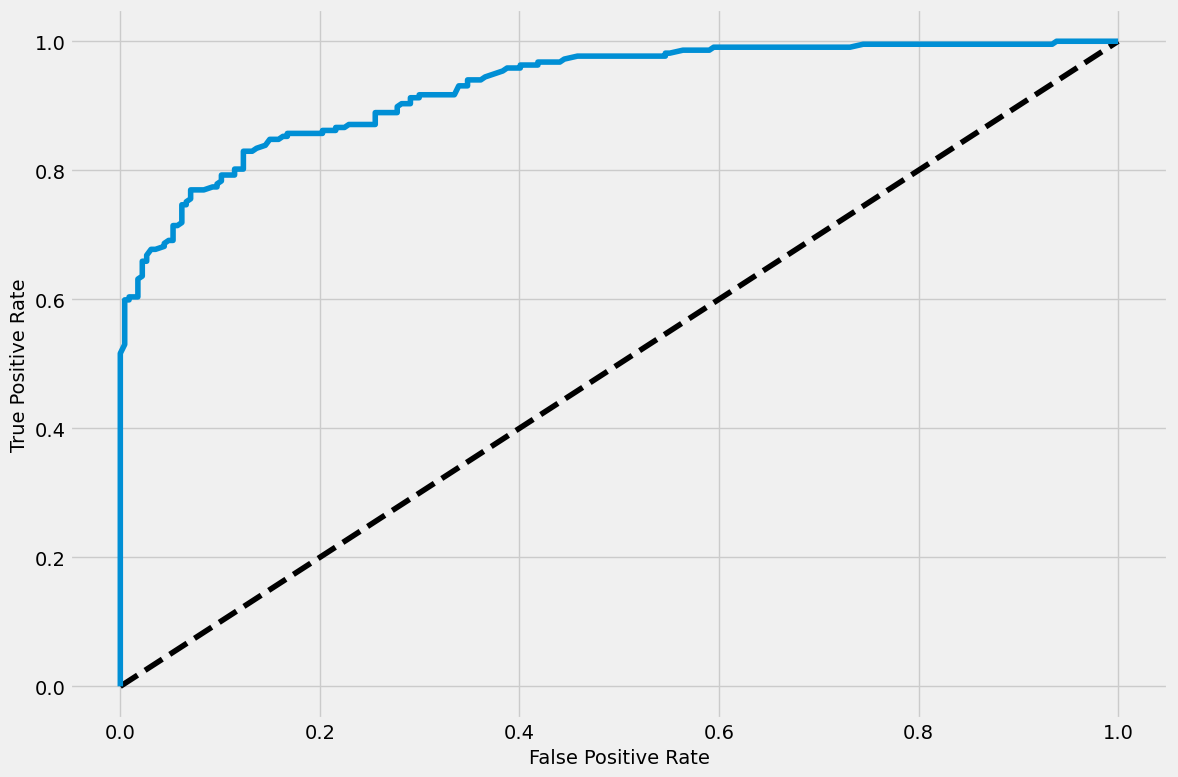

AUC SCORE 0.8490732657991432


In [88]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = final.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
auc_score = roc_auc_score(y_test,final.predict(x_test))
print("AUC SCORE", auc_score)

# Predict the final model

In [89]:
#Prediction
prediction = final.predict(x_test)

In [90]:
Actual = np.array(y_test)
data_pred = pd.DataFrame()
data_pred["Predicted Values"] = prediction
data_pred["Actual Values"] = Actual
data_pred.head()

Predicted Values  Actual Values
0                 1              1
1                 0              0
2                 0              0
3                 1              1
4                 1              1

# Saving the model

In [91]:
import joblib
joblib.dump(final,"Insurance Claim Fraud Detection Project")

['Insurance Claim Fraud Detection Project']